# Сборный проект №1


#### __Описание проекта__

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

#### __План проекта:__
1. __Открыть файл с данными и изучить общую информацию:__
    * __Путь к файлу__:/datasets/games.csv
    
    
2. __Подготовка данных:__
    * Проверить и заменить названия столбцов;
    * Преобразовать данные в нужные типы.
    * Обработать пропуски, дубликаты. Обратить внимание на аббревиатуру 'tbd.
    * Описать причины, которые могли привести к пропускам;
    * Посчитать суммарные продажи во всех регионах и запишите их в отдельный столбец.
    
    
3. __Проведите исследовательский анализ данных:__
    * Какое количество игр выпускалось в разные годы?
    * Исследовать продажи по платформам. 
    * Оценка возможности построения прогноза на 2017.
    * Выбрать несколько потенциально прибыльных платформ.
    * Построить график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Сравнить продажи по платформам.
    * Исследовать влияние на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
    * Соотнести выводы с продажами игр на других платформах.
    * Распределение игр по жанрам, самые прибыльные жанры.
    
    
4. __Составить портрет пользователя каждого региона (NA, EU, JP):__
    * Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    * Самые популярные жанры (топ-5). Поясните разницу.
    * Влияет ли рейтинг ESRB на продажи в отдельном регионе?
    
    
5. __Проверить  гипотезы:__
    * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    * Средние пользовательские рейтинги жанров Action и Sports разные.
    
    
6. __Написать общий вывод__


# Задача
- выявить определяющие успешность игры закономерности. 

__Подключение библиотек__

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from scipy import stats as st
rcParams['figure.figsize'] = 18, 8

# 1. Общий анализ
##### Шаг 1. Откройте файл с данными и изучите общую информацию

In [2]:
try:
    data = pd.read_csv('/content/games.csv', sep = ',')
except:
    data = pd.read_csv('/datasets/games.csv', sep=',')


data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

#### Общая гистрограмма для всех столбцов таблицы:

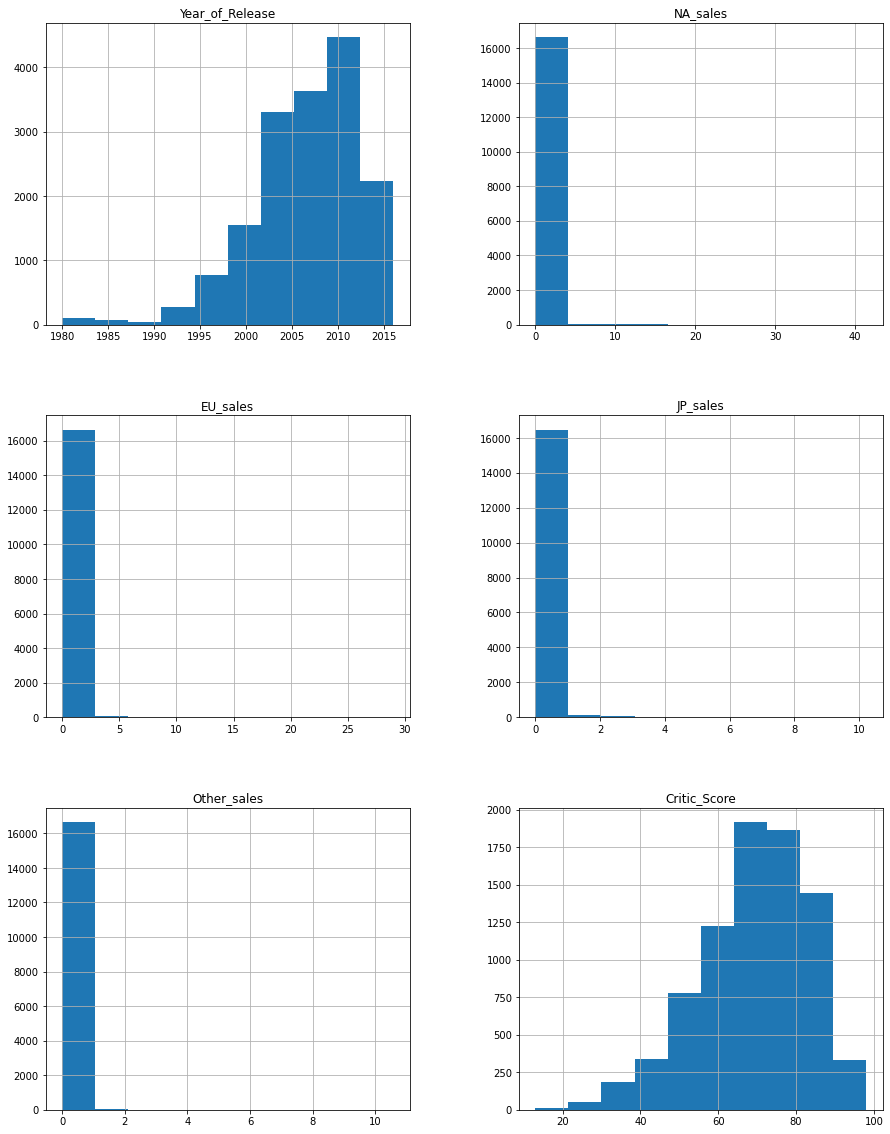

In [4]:
data.hist(figsize=(15, 20))
plt.show()

## Вывод
Первичный анализ выполнен, обнаружены проблемы с типами данных в столбцах: year_of_release, users_scores и разнорегистрововые наименования, для корректной работы требуется привести столбцы к int, float - типам, а наименования трансформировать в нижний регистр. 

Скорее всего при сборе данных из открытых источников присутсвовали не все данные и при попытке их сбора - поля заполнялись пустыми значениям.

Пропуск в наименовиии игр может быть из-за различий в кодировках и перевод в латиницу.

Отсутствие пользовательских отзывов и критиков: всё вышесказанное, плюс их могло просто не быть, такое характерно для игр прошлого. Отсутствие рейтинга или tbd означает не более чем, что издатель не захотел получать рейтинговую оценку ESRB или игра не планировалась выпускаться для региона NA.



---
## 2. Подготовка данных к анализу
##### Шаг 2. Подготовьте данные
1. Замените названия столбцов (приведите к нижнему регистру);
2. Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
3. Обработайте пропуски при необходимости:
4. Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
5. Опишите причины, которые могли привести к пропускам;
6. Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
7. Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

### 2.1. Корретировка регистра в наименовании столбцов

In [5]:
data.columns = data.columns.str.lower()

data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### 2.2./2.3. Корректировка типов данных и замена пропусков
Рассмотрим значение year_of_release на графике

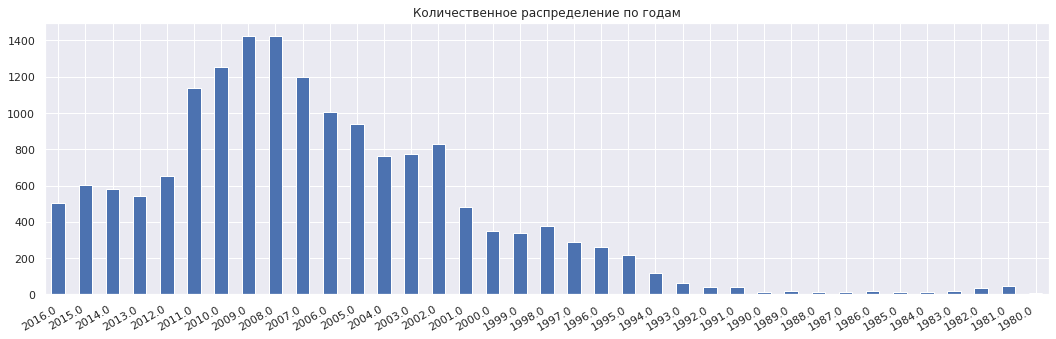

In [6]:
sns.set()
(data['year_of_release']
 .value_counts()
 .sort_index(ascending=False)
 .plot(kind='bar' ,figsize=(18,5))
 .set(title='Количественное распределение по годам')
);
plt.xticks(rotation=30, horizontalalignment='right');

Сделаем корректировку типа данных и уберем пропуски путем их замены на ноль

In [7]:

data['year_of_release'] = data['year_of_release'].fillna(0).astype('int')


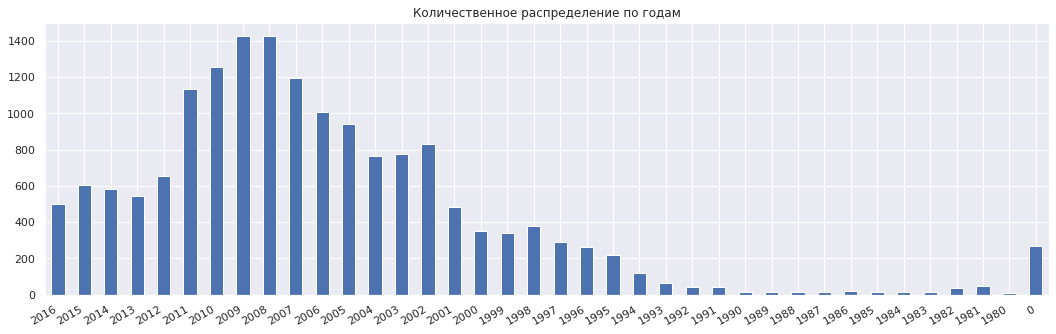

In [8]:
sns.set()
(data['year_of_release']
     .value_counts()
     .sort_index(ascending=False)
     .plot(kind='bar' ,figsize=(18,5))
     .set(title='Количественное распределение по годам')
);  
plt.xticks(rotation=30, horizontalalignment='right');

Кооректировка и замена выполненны, что отчетливо видно по появившемуся "столбу" со значением ноль и количество таких записей порядка 300.

---

Следующим столбцом будет users_score, рассмотрим уникальные значения данного признака на графике и распределение оценок

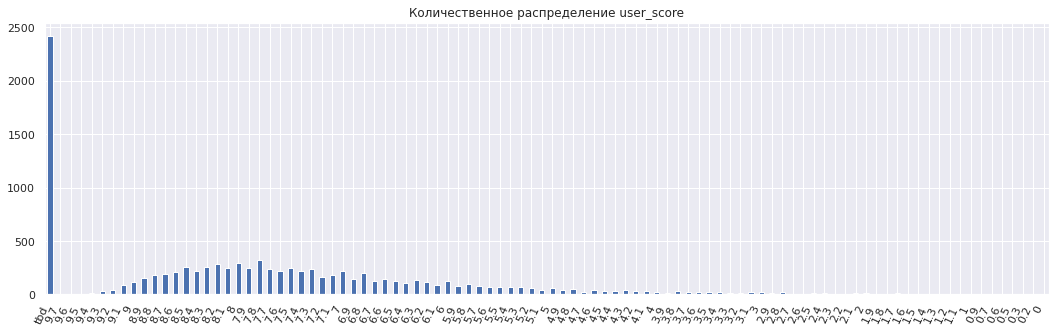

In [9]:
sns.set()
(data['user_score']
 .value_counts()
 .sort_index(ascending=False)
 .plot(kind='bar' ,figsize=(18,5))
 .set(title='Количественное распределение user_score')
);
plt.xticks(rotation=65, horizontalalignment='right');

Пик находится на tbd, рассмотрим распределение оценок без учёта tbd:

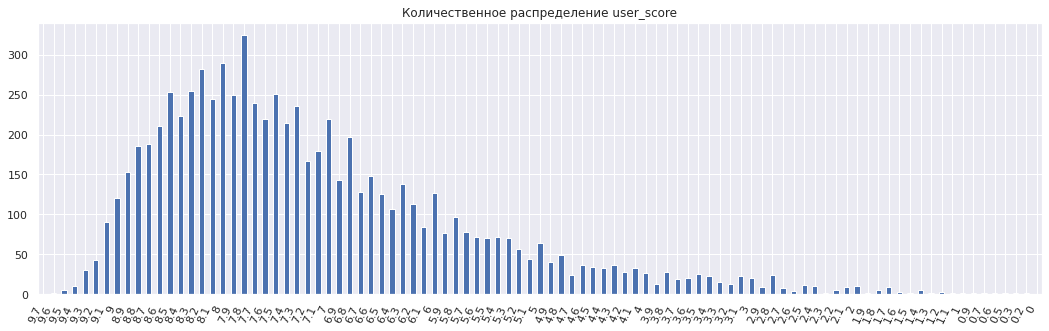

In [10]:
(data[data['user_score'] != 'tbd']['user_score']
 .value_counts()
 .sort_index(ascending=False)
 .plot(kind='bar' ,figsize=(18,5))
 .set(title='Количественное распределение user_score')
);
plt.xticks(rotation=65, horizontalalignment='right');

распределение оценок напоминает - __нормальное распределение__ со положительным "хвостом"

In [11]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Имеется Nan и значение tbd. Где tbd - абревиатура для ещё не вышедших игр, проверим гипотезу:

Количетво годов в которых есть tbd -  20


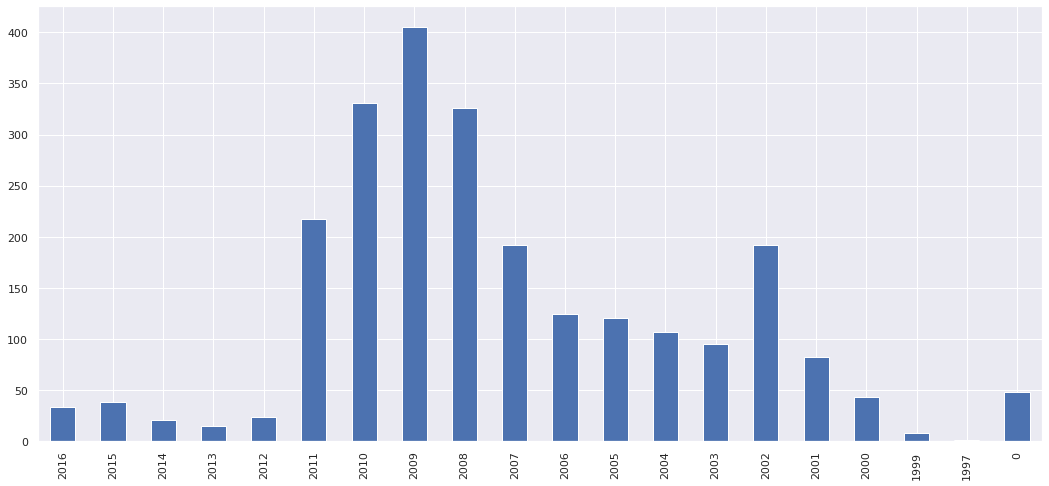

In [12]:
print(\
      'Количетво годов в которых есть tbd - ',\
      len(data[data['user_score'] == 'tbd']['year_of_release'].unique())\
     )
(data[data['user_score'] == 'tbd']['year_of_release']
 .value_counts().sort_index(ascending=False)
 .plot(kind='bar')\
);

Данная гипотеза не подтвердилась, т.к. такое значение было бы только на последнии годы.

Согласно сайту metacritic.com, данный рейтинг означает, что его просто нет. Проверим у скольких игр рейтинг 0. 

In [13]:
data[data['user_score'] == '0']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008,Adventure,0.66,0.0,0.0,0.06,NaN,0,E


Сделаем замену tbd и Nan на ноль, значаит ноль, как рейтинг будет означать нет оценки или не проставлена оценка.
Но перед этим рассмотрим предварительную корреляционную карту

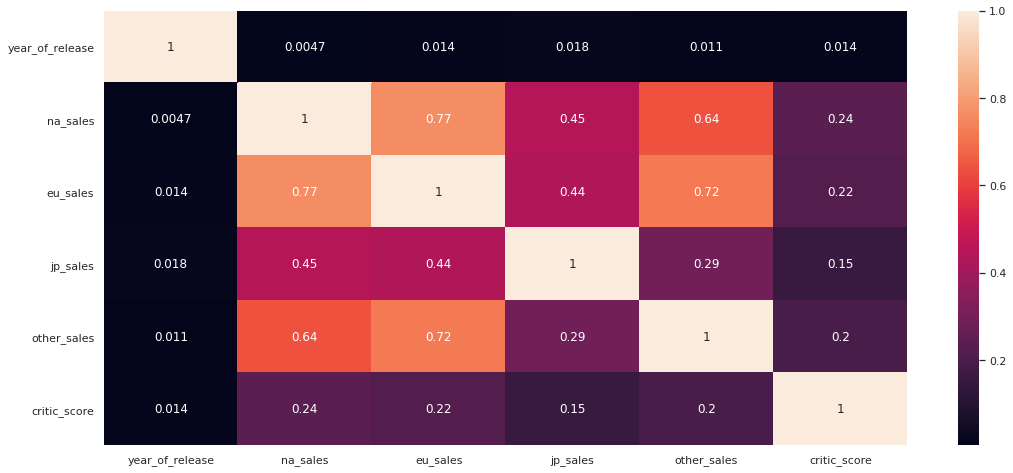

In [14]:
a = data.corr()
sns.heatmap(a, annot=True);

####Замена tbd и Nan на ноль

In [15]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = 0
data['user_score'].fillna('0', inplace=True)

In [16]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='raise')
data['user_score'].describe()

count    16715.000000
mean         3.235363
std          3.688755
min          0.000000
25%          0.000000
50%          0.000000
75%          7.300000
max          9.700000
Name: user_score, dtype: float64


**Рассмотрим другие столбцы с пропусками**

In [17]:
print('пропуски')
data.isnull().sum()

пропуски


name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score            0
rating             6766
dtype: int64

Нужно убрать пропуски в столбцах: имя, жанр

In [18]:

data.loc[data['user_score'] == 'tbd', 'user_score'] = 0
data['user_score'].fillna('0', inplace=True)


data['user_score'] = pd.to_numeric(data['user_score'], errors='raise')
data['user_score'].describe()

count    16715.000000
mean         3.235363
std          3.688755
min          0.000000
25%          0.000000
50%          0.000000
75%          7.300000
max          9.700000
Name: user_score, dtype: float64

проверим присутствие дублей:

In [19]:
print('количество дублей ', data.duplicated().sum())

for i in data.columns:
    if data[i].duplicated().sum() > 0:
        print('|{: >15} | {: >10}|'. format(i, data[i].duplicated().sum()))
    else:
        'good'

количество дублей  0
|           name |       5155|
|       platform |      16684|
|year_of_release |      16677|
|          genre |      16702|
|       na_sales |      16313|
|       eu_sales |      16408|
|       jp_sales |      16471|
|    other_sales |      16560|
|   critic_score |      16632|
|     user_score |      16620|
|         rating |      16706|


Дубликаты в рейтингах - это нормально, но вот дубликаты в наименовании..., скорее всего это связано с тем, что игра выпущена на различные платформы и для каждой свой рейтинг. Сделаем проверку:

In [20]:
games_dubl = data.name.duplicated()
table = pd.merge(data, games_dubl, left_index=True, right_index=True, how='inner')
table.head()

,name_x,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_y
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,False
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,0.0,NaN,False
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,False
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,False
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,0.0,NaN,False


In [21]:
temp_pivot_games = data\
.pivot_table(index=['name', 'genre', 'year_of_release'], values=['platform'], aggfunc='count')\
.sort_values(by='platform', ascending=False)

temp_pivot_games[temp_pivot_games['platform'] > 1].head()

,,,platform
name,genre,year_of_release,
Ratatouille,Action,2007,9
LEGO Marvel Super Heroes,Action,2013,9
FIFA 14,Sports,2013,9
LEGO The Hobbit,Action,2014,8
Angry Birds Star Wars,Strategy,2013,8


Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [22]:
data['revenue'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

Рассмотрим игру, которая повторяется 9 раз:

In [23]:
data.loc[data['name'] == 'Ratatouille']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
1598,Ratatouille,DS,2007,Action,0.49,0.62,0.0,0.14,NaN,0.0,NaN,1.25
2442,Ratatouille,PS2,2007,Action,0.31,0.00,0.0,0.53,65.0,8.0,E,0.84
3069,Ratatouille,PSP,2007,Action,0.22,0.27,0.0,0.16,64.0,7.1,E,0.65
3902,Ratatouille,PS3,2007,Action,0.09,0.32,0.0,0.10,55.0,4.8,E,0.51
3948,Ratatouille,Wii,2007,Action,0.43,0.03,0.0,0.04,62.0,6.7,E,0.50
6398,Ratatouille,X360,2007,Action,0.23,0.02,0.0,0.02,56.0,0.0,E,0.27
7681,Ratatouille,GBA,2007,Action,0.14,0.05,0.0,0.00,65.0,0.0,E,0.19
9015,Ratatouille,GC,2007,Action,0.11,0.03,0.0,0.00,60.0,5.6,E,0.14
14514,Ratatouille,PC,2007,Action,0.01,0.01,0.0,0.00,NaN,7.9,E,0.02


Предположение о том, что одна игра создается для различных платформ правдиво.

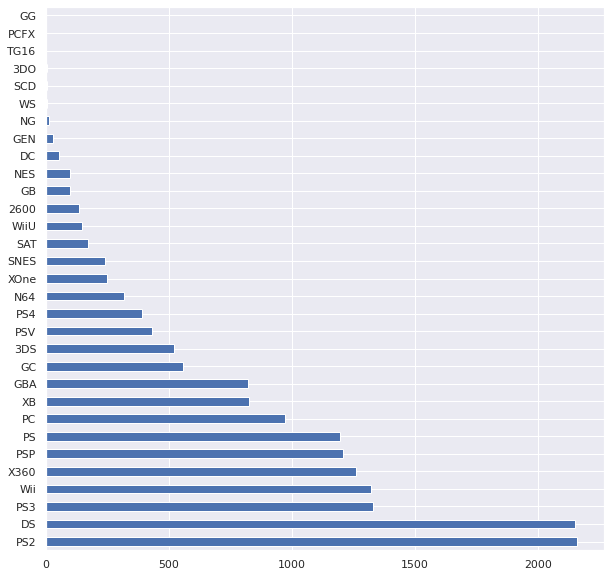

In [24]:
data['platform'].value_counts().plot(kind='barh',figsize=(10,10));

Проблем не обнаружено в платформах.

---

Столбец rating содержит данные рейтинга ESRB. Рейтинги ESRB дейтвительны в США и Канаде, и большинство игровых издателей с уважением относятся к этой организации. Помимо ESRB, существуют и другие рейтинговые системы оценки игр: PEGI в Европе, CERO в Японии, а так же в Австралии (отличается своей непродуманностью и недружелюбием). Значит данный рейтинг только для США и Канады, а в нашей таблице данных больше и с другой локацией, поэтому пропуски - это нормально, заменим их на TBD. 

Столбец critic_store содержит оценку критиков в 100-бальной шкале оценок, если пропуск то заменить лучше на 0, что будет означать, что критики нет для данной игры.

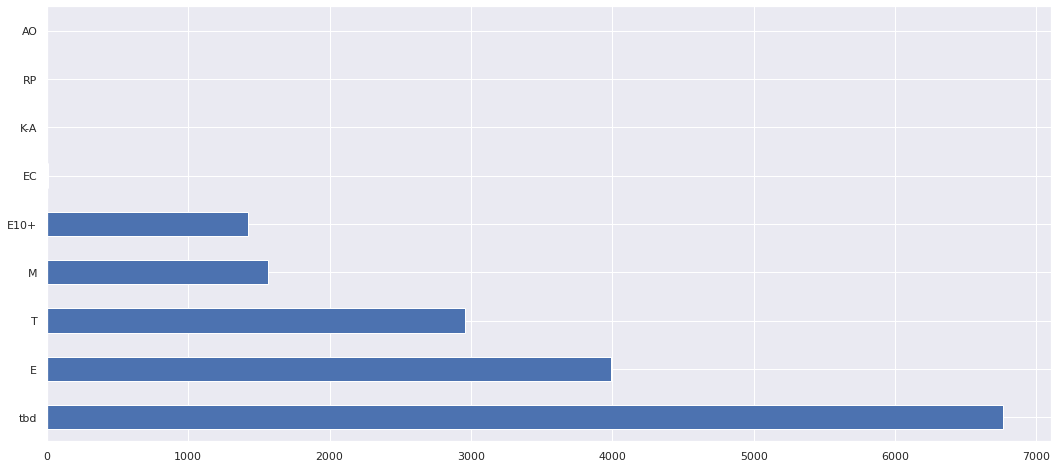

In [25]:

data['rating'].fillna('tbd', inplace=True)
data['critic_score'].fillna(0, inplace=True)


data['rating'].value_counts().plot(kind='barh');

In [26]:
data.loc[data['name'] == 'Ratatouille']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
1598,Ratatouille,DS,2007,Action,0.49,0.62,0.0,0.14,0.0,0.0,tbd,1.25
2442,Ratatouille,PS2,2007,Action,0.31,0.00,0.0,0.53,65.0,8.0,E,0.84
3069,Ratatouille,PSP,2007,Action,0.22,0.27,0.0,0.16,64.0,7.1,E,0.65
3902,Ratatouille,PS3,2007,Action,0.09,0.32,0.0,0.10,55.0,4.8,E,0.51
3948,Ratatouille,Wii,2007,Action,0.43,0.03,0.0,0.04,62.0,6.7,E,0.50
6398,Ratatouille,X360,2007,Action,0.23,0.02,0.0,0.02,56.0,0.0,E,0.27
7681,Ratatouille,GBA,2007,Action,0.14,0.05,0.0,0.00,65.0,0.0,E,0.19
9015,Ratatouille,GC,2007,Action,0.11,0.03,0.0,0.00,60.0,5.6,E,0.14
14514,Ratatouille,PC,2007,Action,0.01,0.01,0.0,0.00,0.0,7.9,E,0.02


Выявим строки с пропуском в жанре для анализа

In [27]:
data['genre'].fillna('ggg', inplace=True)
data[data['genre'] == 'ggg']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
659,NaN,GEN,1993,ggg,1.78,0.53,0.00,0.08,0.0,0.0,tbd,2.39
14244,NaN,GEN,1993,ggg,0.00,0.00,0.03,0.00,0.0,0.0,tbd,0.03


Пропуски в имени и жанре оказались взаимосвязаны,не несут какой-либо информации поэтому лучше их удалить 

In [28]:
data = data.drop([659,14244])
data[data['genre'] == 'ggg']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue


**Проверка оставшихся пропусков**

In [29]:
print('пропуски')
print(data.isnull().sum())
data = data.dropna()

пропуски
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
revenue            0
dtype: int64


In [30]:


print('Сумарное количесво пропусков', data.isnull().sum().sum())

Сумарное количесво пропусков 0


### Вывод:
Все пропуски обработанны:
1. Строки с пропуском имени были удаленны, так же как и строки с пропуском жанра.
2. Пропуски в столбце rating были замененны на tbd, что означает что рейтинга нет или он ожидается
3. Пропуски в столбцах critic_score и user_score были заменены на нулевые, что означает, что нет оценки. Сделать замену на медианное или какое-либо иное значение на текущем этапе нельзя, т.к. будет смещение в данных.

##### Требовалось сделать по заданию:
- [x] Замените названия столбцов (приведите к нижнему регистру);
- [x] Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- [x] Обработайте пропуски при необходимости:
- [x] Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- [x] Опишите причины, которые могли привести к пропускам;
- [x] Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
- [x] Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

## 3. EDA
###### Шаг 3. Проведите исследовательский анализ данных
1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы? 
3. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.
4.Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
5. Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.
6. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
7. Соотнесите выводы с продажами игр на других платформах.
8. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Есть гипотеза, что у некоторых игр, с пропущенными годами, есть данные по годам, но по другим платформам, поэтому сделаем заполнение нулевого года данными на основании медианного года выпуска определенной игры без учёта платформы:

In [31]:
temp_pivot_games = data\
.pivot_table(index=['name', 'genre'], values=['year_of_release'], aggfunc='mean')\
.sort_values(by='year_of_release', ascending=False)

temp_pivot_games[(temp_pivot_games['year_of_release'] % 1) != 0].head()

,,year_of_release
name,genre,
Digimon Story: Cyber Sleuth,Role-Playing,2015.500000
The Book of Unwritten Tales 2,Adventure,2015.500000
Rise of the Tomb Raider,Adventure,2015.500000
Need for Speed (2015),Racing,2015.333333
Arslan: The Warriors of Legend,Action,2015.333333


In [32]:

def temp_func(row):
    year = row['year_of_release']
    if year == 0:
        year = temp.loc[row['name'],'year_of_release']
        return year
    else:
        return row.year_of_release


temp = data.pivot_table(index='name', values='year_of_release', aggfunc='max')
data['year_of_release'] = data.apply(temp_func, axis=1).astype('int64')



Проверим как заполнились игровые пропуски, на примере:

In [33]:

data.loc[182:184]
data[data['name'] == 'Madden NFL 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
183,Madden NFL 2004,PS2,2003,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
1881,Madden NFL 2004,XB,2003,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E,1.09
3889,Madden NFL 2004,GC,2003,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E,0.51
5708,Madden NFL 2004,GBA,2003,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E,0.31


In [34]:
data[data['name'] == 'wwe Smackdown vs. Raw 2006']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
475,wwe Smackdown vs. Raw 2006,PS2,0,Fighting,1.57,1.02,0.0,0.41,0.0,0.0,tbd,3.0


In [35]:
print('количество игр без даты -', temp[temp['year_of_release'] == 0]['year_of_release'].count())
data[data['year_of_release'] == 0].head()

количество игр без даты - 133


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
475,wwe Smackdown vs. Raw 2006,PS2,0,Fighting,1.57,1.02,0.0,0.41,0.0,0.0,tbd,3.00
627,Rock Band,X360,0,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T,2.47
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,0.0,E,2.40
805,Rock Band,Wii,0,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T,2.09
1142,Rock Band,PS3,0,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T,1.62


Обнаружено, что у некоторых игр в наименовании есть год, что позволяет нам предзаполнить года. Обработаем оставшиеся записи с нулевыми годами:

In [36]:
year = str([x for x in range(1980,2018)])

def temp_func(row):
    yrow = row['year_of_release']
    nrow = row['name']
    if yrow == 0:
        sp_row = nrow.split(' ')
        for j in sp_row:
            if (j in year) and (len(j)==4):
                return int(j)
            else:
                return yrow
    else:
        return yrow
      
data['year_of_release'] = data.apply(temp_func, axis=1)

Проверка на искожения от функции (визуальная)

In [37]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,tbd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,tbd,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,tbd,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,tbd,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,tbd,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,tbd,0.01


In [38]:
print('количество игр без даты -', temp[temp['year_of_release'] == 0]['year_of_release'].count())
data[data['year_of_release'] == 0].head()

количество игр без даты - 133


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
475,wwe Smackdown vs. Raw 2006,PS2,0,Fighting,1.57,1.02,0.0,0.41,0.0,0.0,tbd,3.00
627,Rock Band,X360,0,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T,2.47
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,0.0,E,2.40
805,Rock Band,Wii,0,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T,2.09
1142,Rock Band,PS3,0,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T,1.62


In [39]:
data[data['year_of_release'] == 0]['year_of_release'].count()

146

Данные по годам удалось восстановить почти у половины записей, соответственно строки, в которых отсутствует год нам для анализа не нужны, т.к. нет главного признака - год, что не позволяет сделать анализ в принципе.

In [40]:

data = data[data['year_of_release']!=0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     16567 non-null  float64
 9   user_score       16567 non-null  float64
 10  rating           16567 non-null  object 
 11  revenue          16567 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


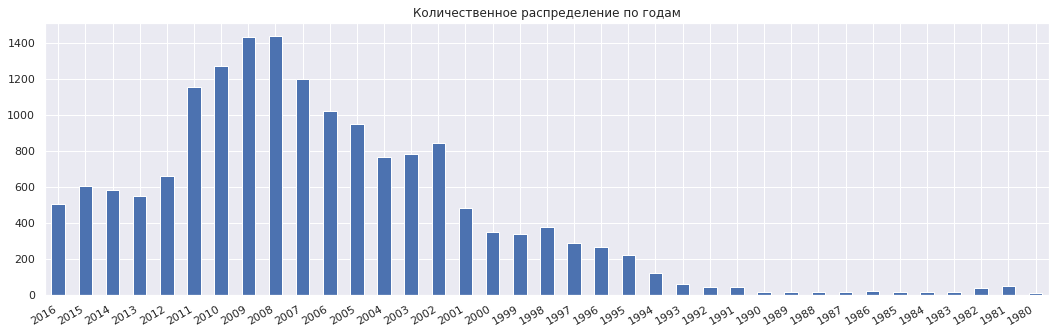

In [41]:
sns.set()
(data['year_of_release']
     .value_counts()
     .sort_index(ascending=False)
     .plot(kind='bar' ,figsize=(18,5))
     .set(title='Количественное распределение по годам')
);  
plt.xticks(rotation=30, horizontalalignment='right');


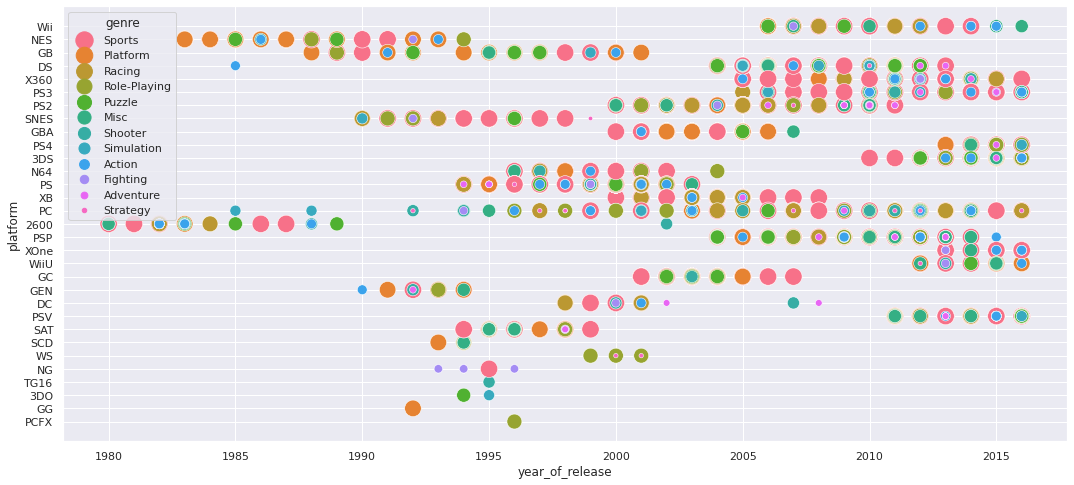

In [42]:
sns.scatterplot(x="year_of_release", y="platform",hue="genre",size="genre",data=data,sizes=(20, 300));
                
                
                

Многие платформы устарели, например,  платформа "2600" была только до 1990, соответственно изменилось время и факторы успеха должны были измениться. Рассмотрим график с 2000 года.

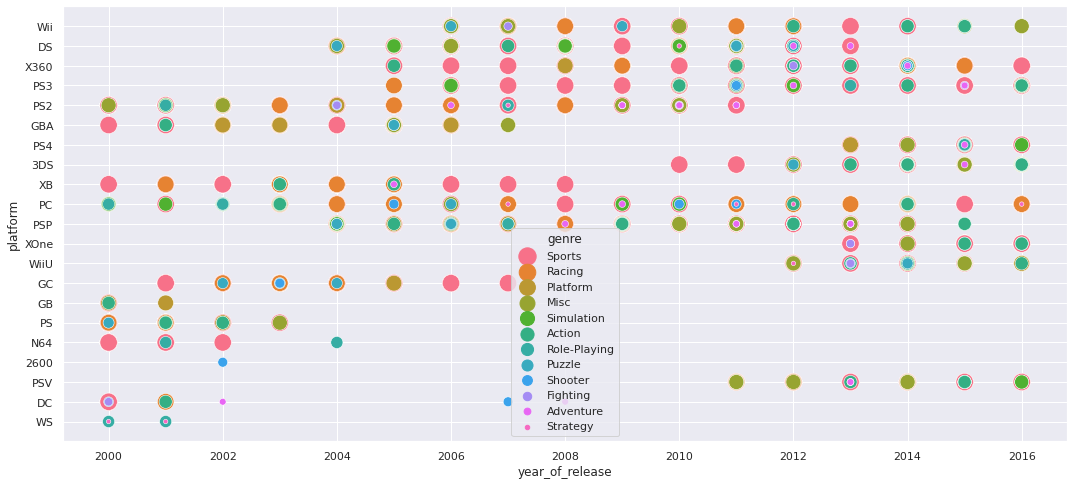

In [43]:
sns.scatterplot(x="year_of_release", y="platform"\
                ,hue="genre"\
                ,size="genre"\
                ,data=data[data['year_of_release'] >= 2000]\
                ,sizes=(20, 300));

##### **Вывод:**
Часть платформ попросту изчесли к 21 году, так как технологии позволяющие развивать игровой бизнес развиваются, происходят технологические прорывы, на которых намного "интереснее" создать свой продукт, а не на устаревших технологиях.


##### Рассмотрим какой срок жизни у платформы

In [44]:
temp = (data.loc[:,['year_of_release', 'platform']]
        .drop_duplicates()
        .pivot_table(index=['platform'], values='year_of_release', aggfunc='count')
       )
temp

,year_of_release
platform,
2600,11
3DO,2
3DS,7
DC,7
DS,11
GB,13
GBA,8
GC,7
GEN,5


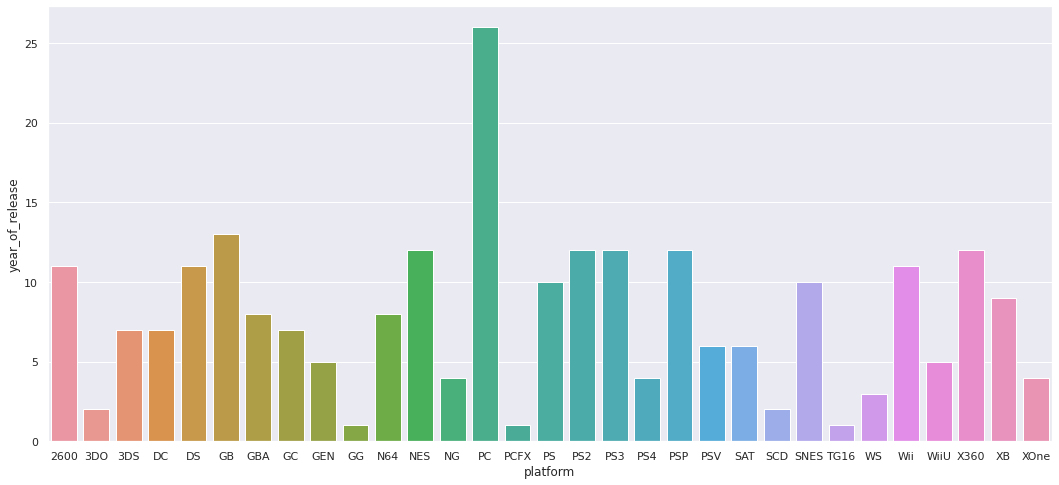

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


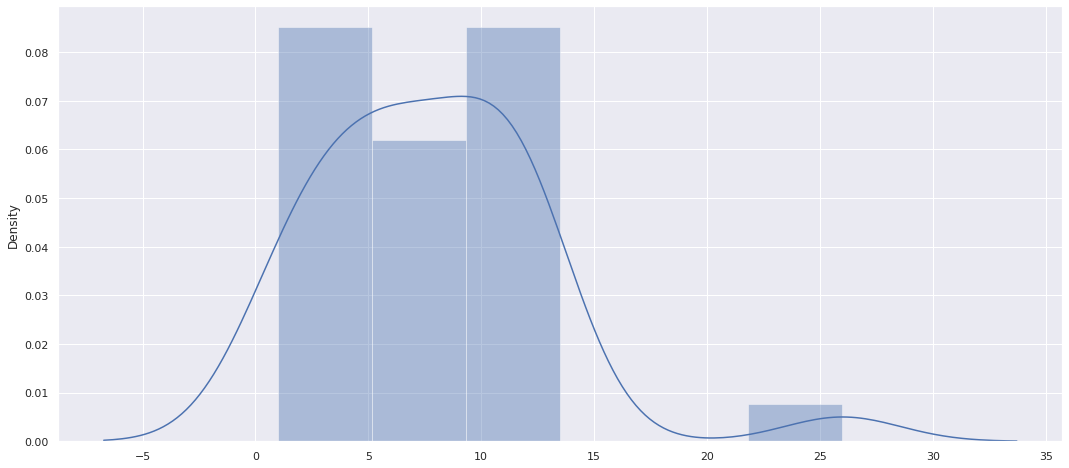

In [45]:


sns.barplot(x=temp.index, y='year_of_release', data = temp) 
plt.show()
sns.distplot(temp) 
plt.show()

In [46]:
temp.year_of_release.describe() 

count    31.000000
mean      7.806452
std       5.114811
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      26.000000
Name: year_of_release, dtype: float64

##### **Вывод:**
Средний срок жизни платформы 7 лет


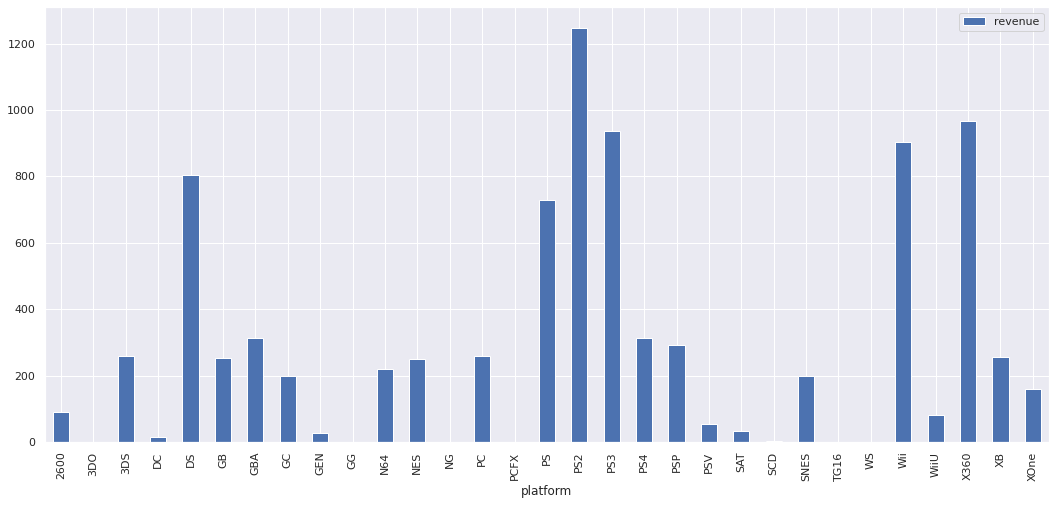

In [47]:
data.pivot_table(index='platform', values='revenue', aggfunc='sum').plot(y='revenue', kind='bar');

Из гистограммы видно, что наболее продаваемыми оказались игры 6 платформ с суммарными продажами более 600 млн копий. Определим их названия:

In [48]:
top_platforms = data.pivot_table(index='platform', values='revenue', aggfunc='sum').sort_values(by='revenue', ascending=False).head(6)
top_platforms

,revenue
platform,
PS2,1247.16
X360,966.61
PS3,935.19
Wii,903.31
DS,804.28
PS,727.58


Построим графики распределения продаж по годам для полученных платформ с наибольшими суммарными продажами:


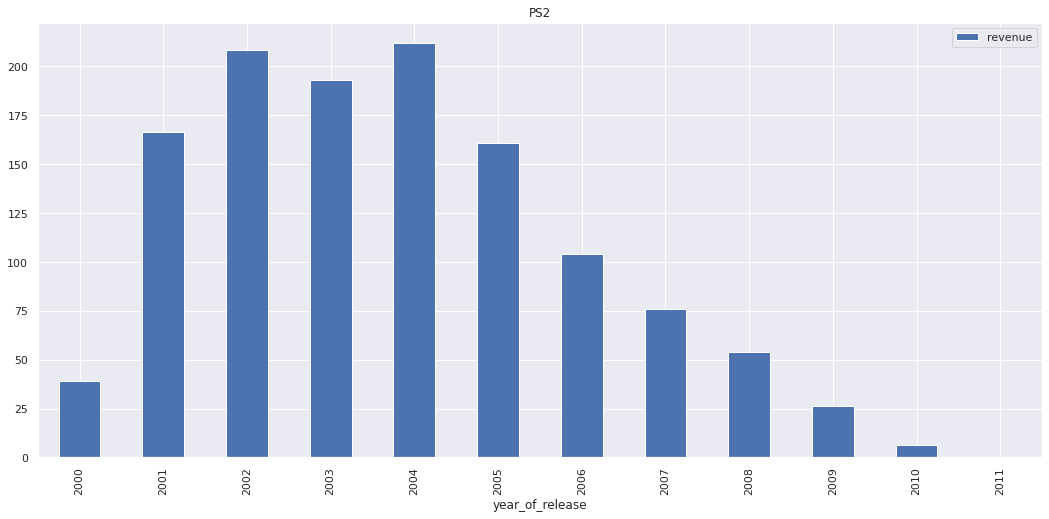

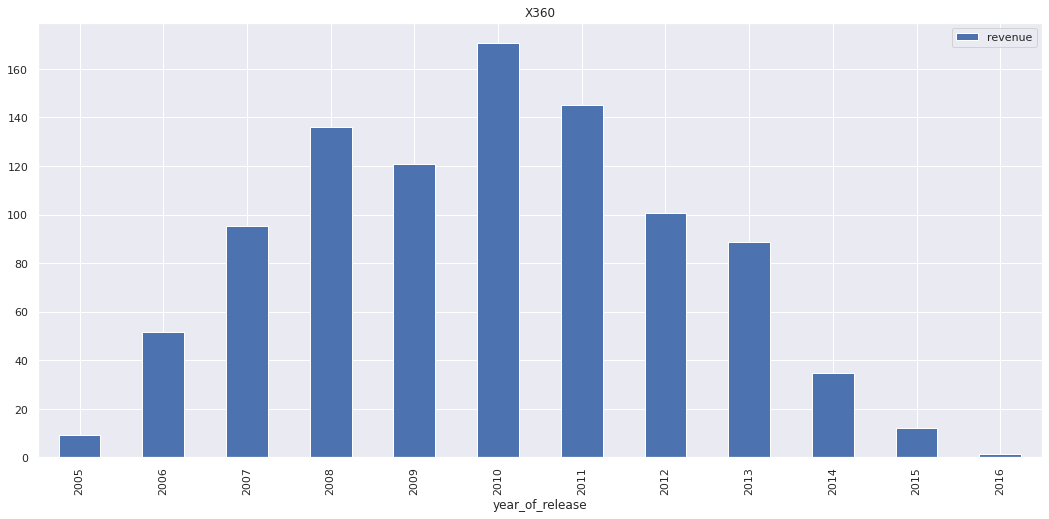

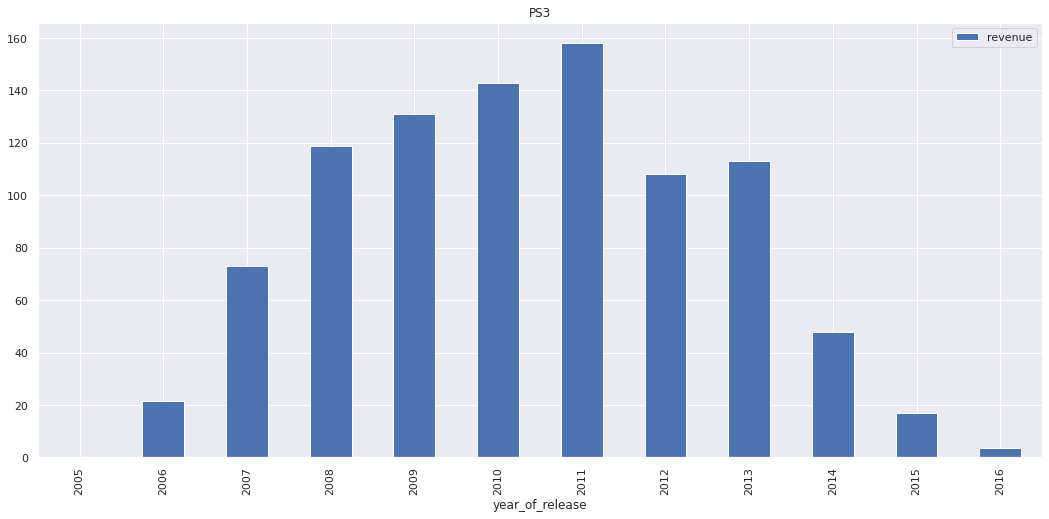

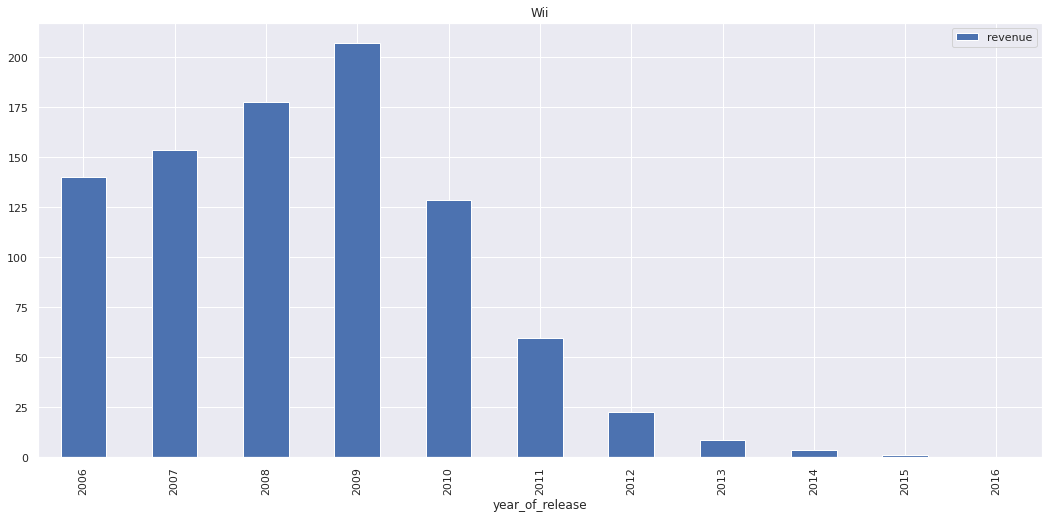

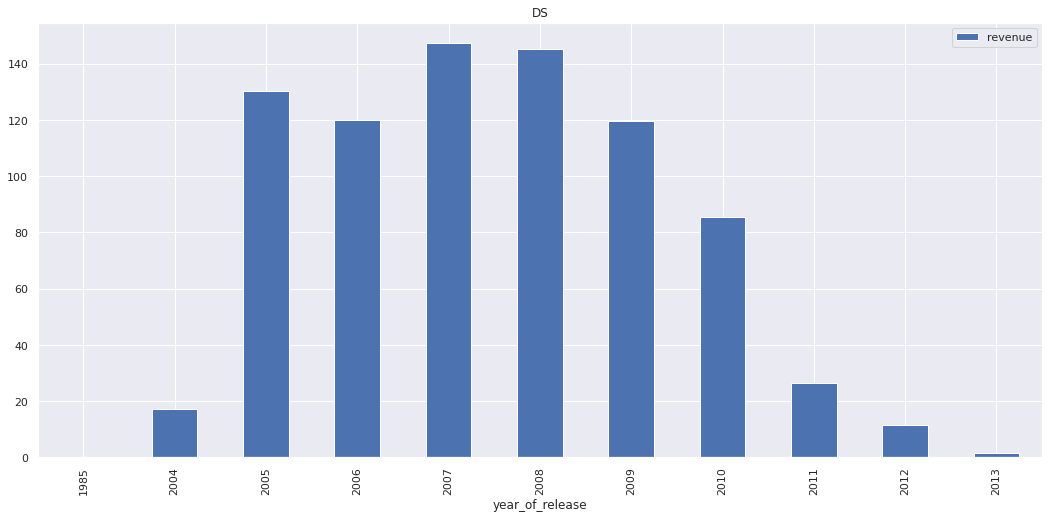

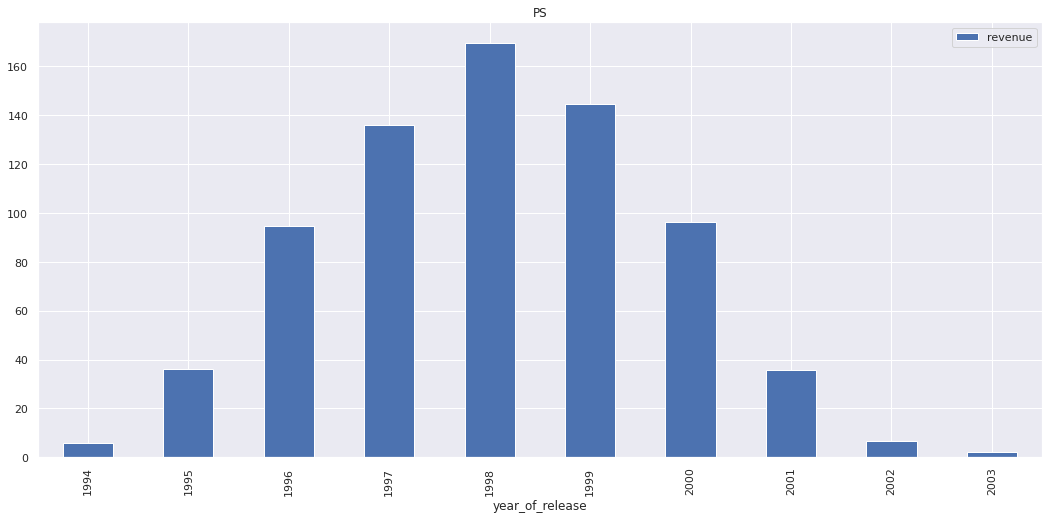

In [49]:
for i in top_platforms.index:
    (data.query('platform == @i')
    .pivot_table(index='year_of_release', values='revenue', aggfunc='sum')
    .plot(kind='bar', title=i)
    )
    plt.show()

Из графика видно, что период популярности платформ в среднем составляет 6-7 лет, хотя появление и исчезновение платформ варьируется от года к году. Из графика также видно, что самые популярные платформы практически исчезли из продаж между 2013 и 2014 годами.Для того чтобы определить реальный период прогноза на 2017 год, мы можем посмотреть на динамику продаж всех платформ по годам и оценить количество новых перспективных платформ, которые оценить, когда они только появились на рынке.

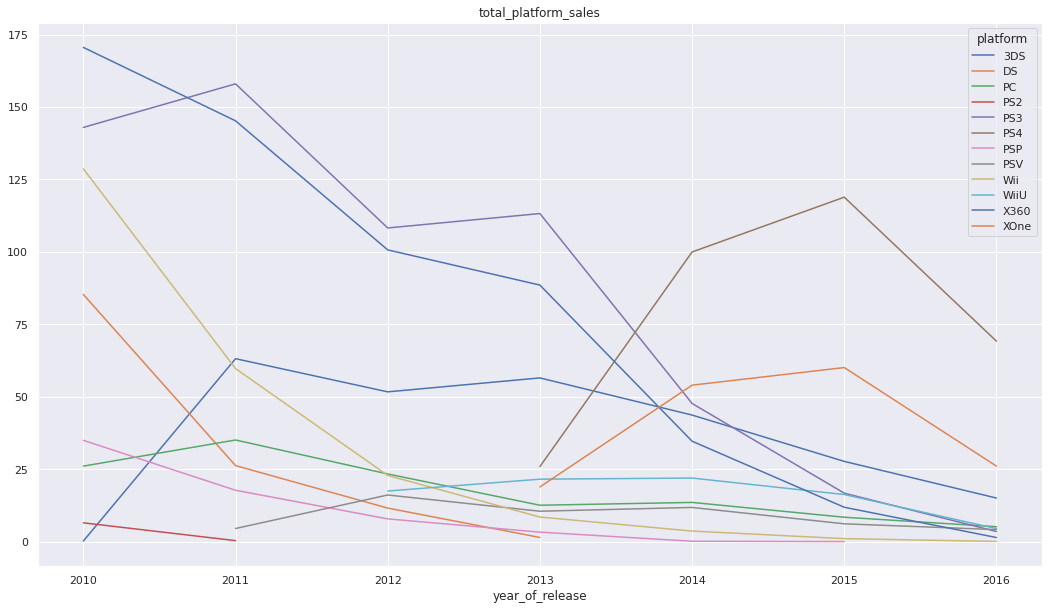

In [50]:
(data
    .query('year_of_release >= 2010')
    .pivot_table(index='year_of_release', columns='platform', values='revenue', aggfunc='sum')
    .plot(title='total_platform_sales', grid=True, figsize=(18, 10)));

Результаты показывают, что с 2013 года появились новые перспективные платформы. Поскольку компьютерные игры - динамично меняющаяся отрасль, в прогнозе на 2017 год в качестве текущего года будут ***взяты данные с 2014 года.***   
(Исправляюсь за 2016 год тут, буду с 2014 брать данные)

Следующие платформы неактуальны: WS, DC, N64,PS, GB, GC, XB, PS, PS2, DS, GBA. Рассмотрим график без данных платформ.

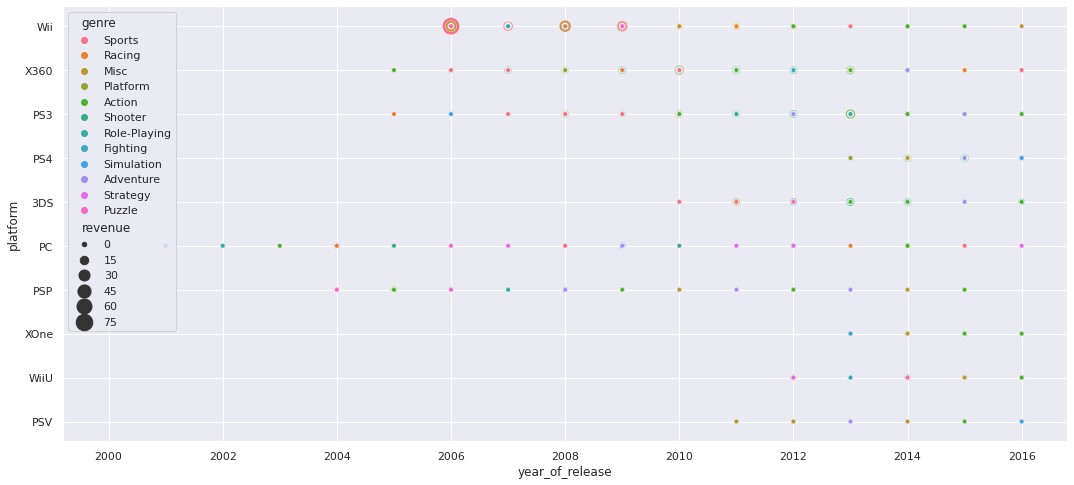

In [51]:
modern_platform = set(data['platform'].unique()) - \
set([ 'WS', 'DC', 'N64','PS', 'GB', 'GC', 'XB', 'PS', 'PS2', 'DS', 'GBA', '2600'])

temp_games = data[(data['year_of_release'] >= 2000)&(data['platform'].isin(modern_platform))]
sns.scatterplot(x="year_of_release", y="platform"\
                ,hue="genre"\
                ,size="revenue"\
                ,data=temp_games\
                ,sizes=(20, 300));

Информативность снизилась, жанры перекрывают друг друга, Но видно что в 2006 году у компании Wii была рекордная выручка по сравнению с другими платформами.

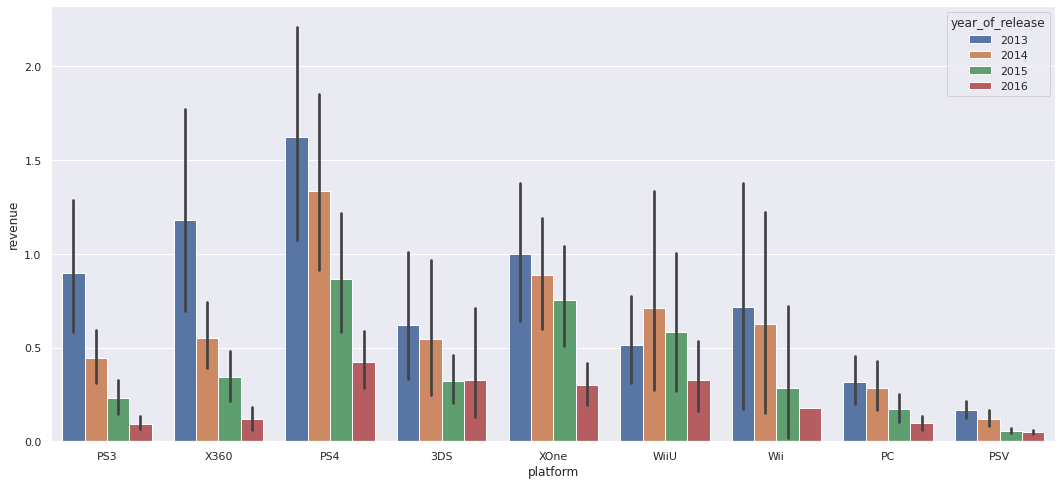

In [52]:
temp_games = temp_games[(temp_games['year_of_release'].isin([2013, 2014, 2015, 2016]))&(temp_games['platform'] != 'PSP')]
ax = sns.barplot(y='revenue', x='platform', hue='year_of_release',\
                 data = temp_games\
                )

Общий тренд всех игровых платформ - падение, т.е. ежегодное падение общей выручки в рамках всех жанров.

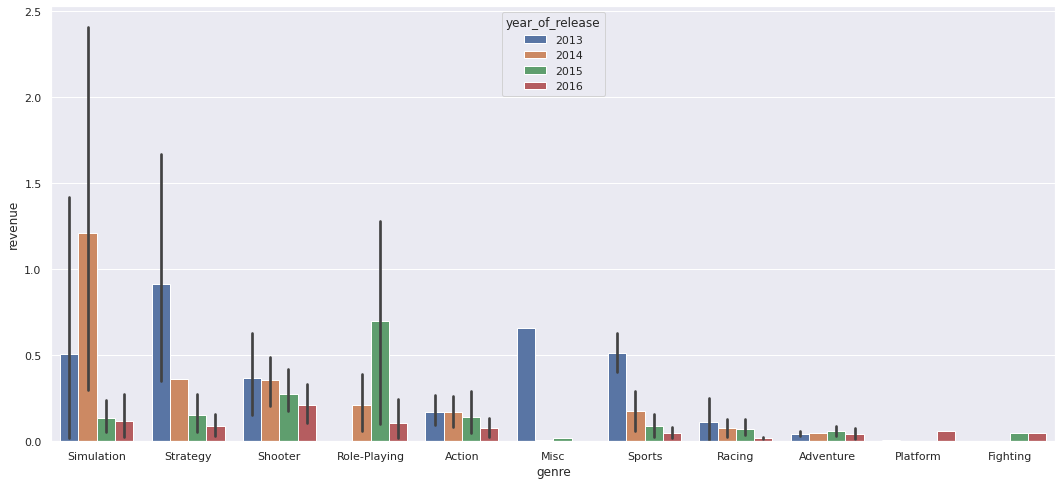

In [53]:
ax = sns.barplot(y='revenue', x='genre', hue='year_of_release',\
                 data = temp_games[(temp_games['year_of_release'].isin([2013, 2014, 2015, 2016]))&\
                                   (temp_games['platform'] == 'PC')]\
                )

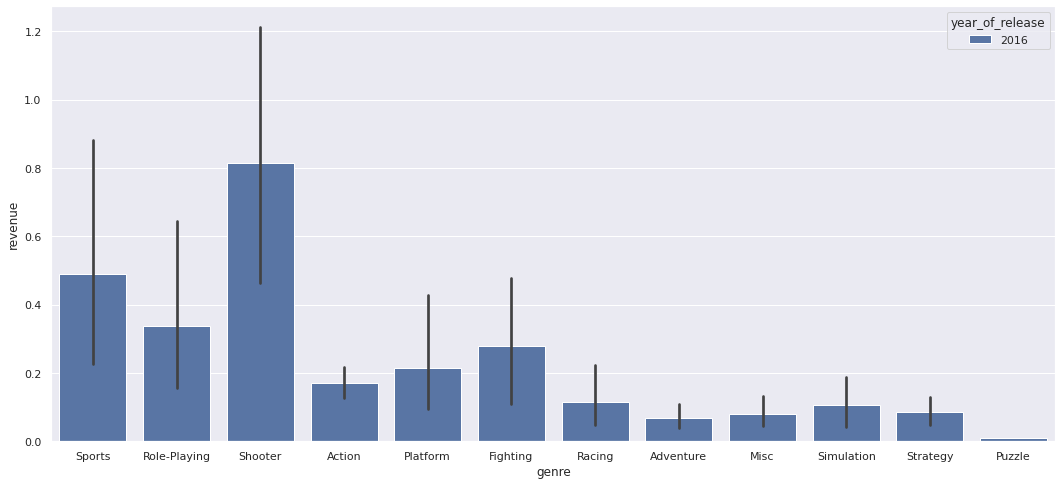

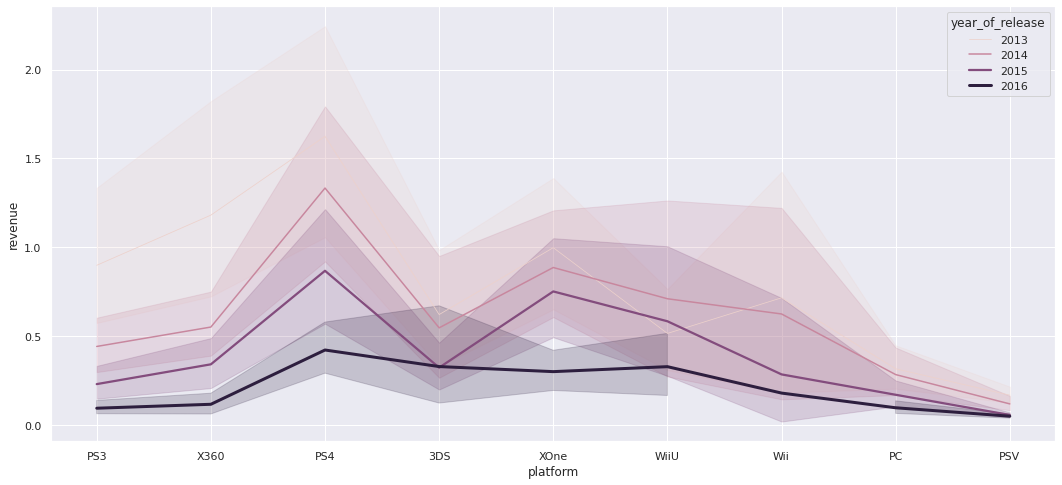

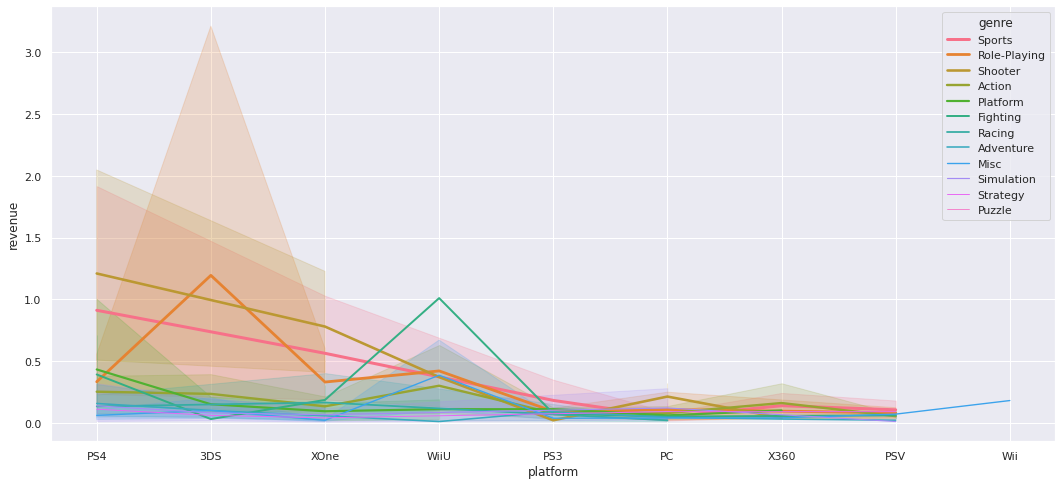

In [54]:
def revenue():
    
    #Выручка в разрезе жанров игр за 2016 год
    ax_1 = sns.barplot(y='revenue', x='genre', hue = 'year_of_release'\
                     ,data = temp_games[(temp_games['year_of_release'].isin([2016]))\
                            ].sort_values(by='revenue', ascending=False))
    plt.show()
    
    #Выручка по платформам в разрезе четырех последних лет
    ax_2 = sns.lineplot(y='revenue', x='platform', hue='year_of_release', size = 'year_of_release'\
                     ,data = temp_games[(temp_games['year_of_release'].isin([2013, 2014, 2015, 2016]))])
    plt.show()
    
    #Использование жанров на платформах за 2016 год
    ax_3 = sns.lineplot(y='revenue', x='platform', hue='genre', size = 'genre'\
                     ,data = temp_games[(temp_games['year_of_release'].isin([2016]))])
    plt.show()
revenue()

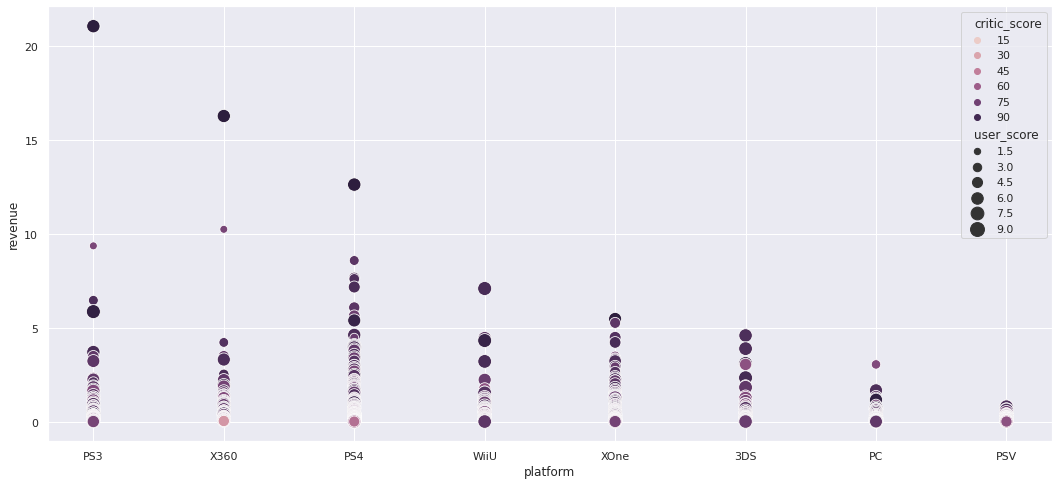

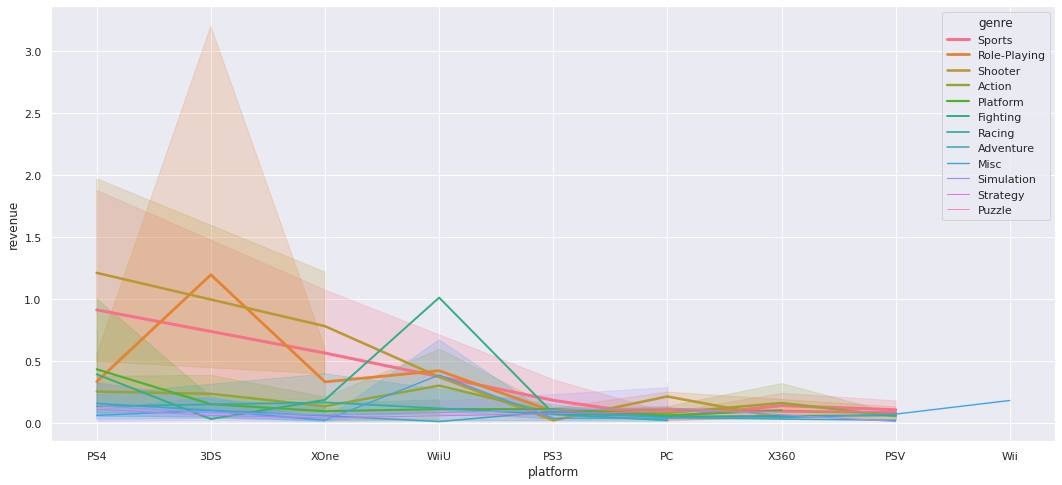

In [55]:
ax = sns.scatterplot(y='revenue', x='platform', hue='critic_score', size = 'user_score'\
                 ,data = temp_games[(temp_games['year_of_release'].isin([2012,2013,2014,2015,2016]))\
                                    &(temp_games['user_score'] > 0)\
                                    &(temp_games['critic_score'] > 0)\
                       ],\
                     sizes=(30,200)\
                )
plt.show()
ax = sns.lineplot(y='revenue', x='platform', hue='genre', size = 'genre'\
                 ,data = temp_games[(temp_games['year_of_release'].isin([2016]))\
                        #&(temp_games['platform'] == 'PC')\
                       ]\
                )
plt.show()

__Гипотеза__: жанровый портфель уменьшается в связи с нисходящим тредом выручки.

__Гипотеза__: уменьшение жанров ведёт к вымиранию платформы

##### **Вывод:**
1. Игровая индустрия очень быстро изменяется;
2. Тренд выручки нисходящий;
3. Топ платформы: PS4, WiiU, XOne, 3DS;
4. Топовые жанры: Shooters, Sports, Role-playing - 2016 и 2015 годов.
5. Топ-низ жанры: Adventure, Puzzle
5. Средний срок жизни платформы - 7 лет.

In [56]:
#проверим, действительно ли остался в 2016 году у данной платформы только один жанр
temp_games[(temp_games['year_of_release'].isin([2016]))\
                        &(temp_games['platform'] == 'Wii')\
                       ]['genre']

8009    Misc
Name: genre, dtype: object

In [57]:
data[(data['platform'] == 'Wii')].pivot_table('name','year_of_release', aggfunc='count').describe()

,name
count,11.000000
mean,118.272727
std,125.647993
min,1.000000
25%,9.000000
50%,48.000000
75%,220.500000
max,325.000000


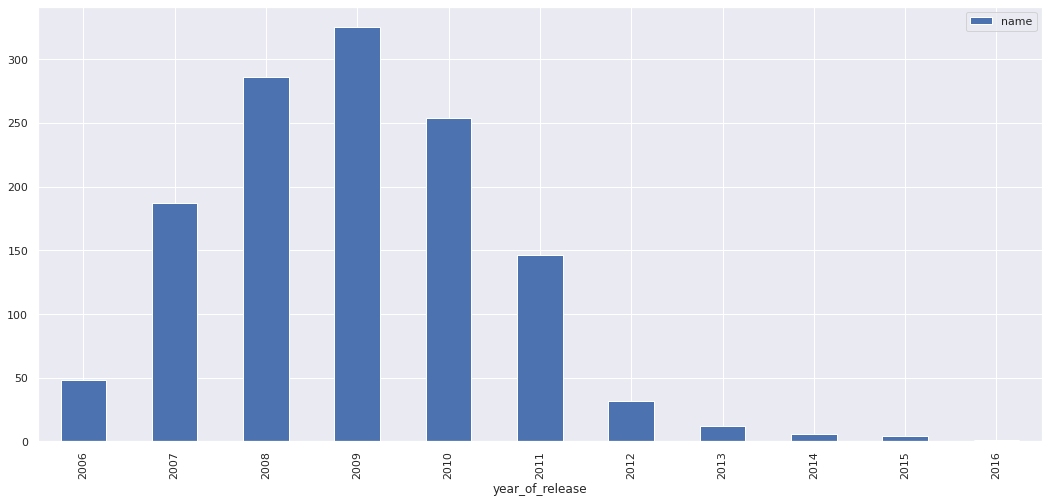

In [58]:
data[(data['platform'] == 'Wii')].pivot_table('name','year_of_release', aggfunc='count').plot(kind='bar');

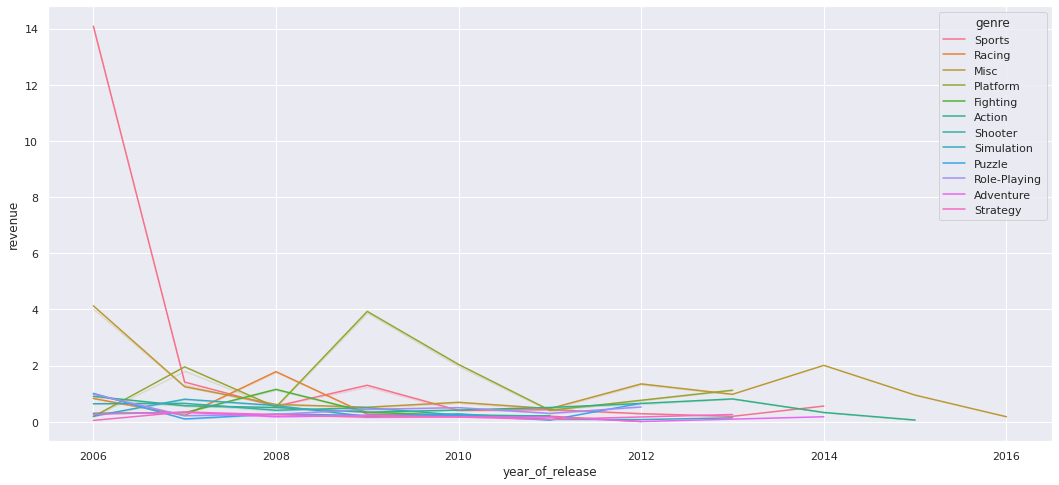

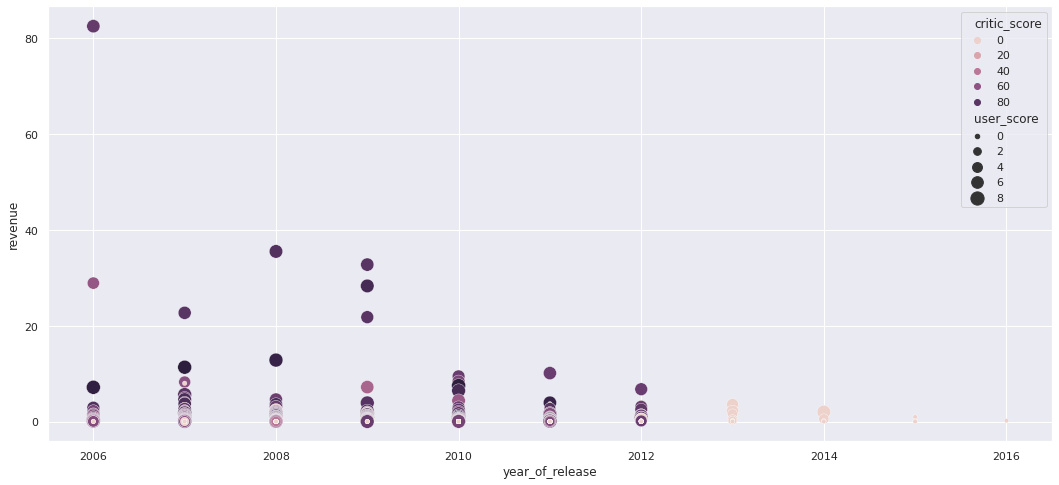

In [59]:
ax = sns.lineplot(y='revenue', x='year_of_release', hue='genre',\
                  markers=True, ci=False,\
                 data = data[(data['platform'] == 'Wii')])
plt.show()

ax = sns.scatterplot(y='revenue', x='year_of_release',hue='critic_score',size='user_score',\
                     sizes=(20,200), data = data[(data['platform'] == 'Wii')])
plt.show()

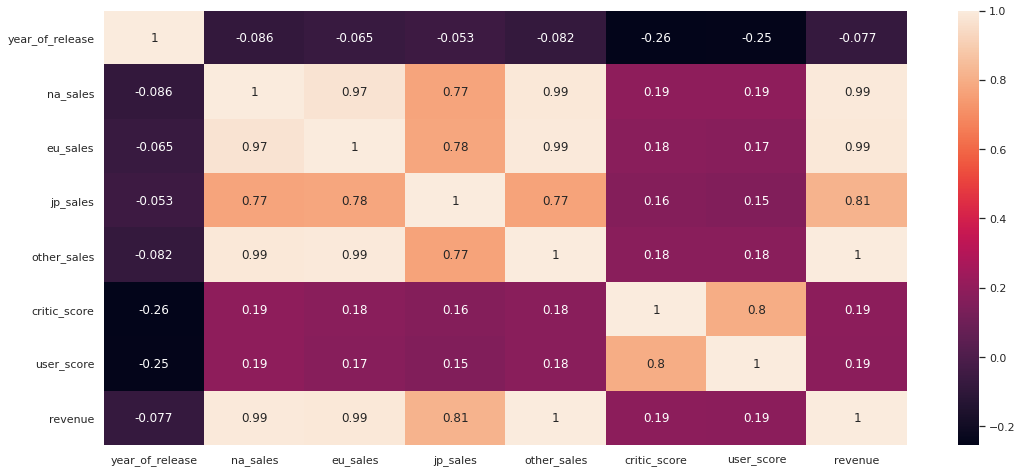

In [60]:
a = data[(data['platform'] == 'Wii')].corr()
sns.heatmap(a, annot=True);

Судя по всему, платформа Wii с каждым годом теряет доходы, жанры игр сокращаются, а негативные отзывы пользователей растут: с 325 игр в 2009 году до 1 игры в 2016 году, снижение с 2012 года и далее, симметрично периоду введения платформы. количество игр увеличилось, и платформа начала выживать. Существует четкое нормальное распределение. Нет богатого портфеля жанров, платформа истощена, а разработчики больше не пишут игры из-за снижения доходов от игр. Анализ платформы подтвердил первоначальное предположение о девятилетнем сроке службы платформы.





##### Рассмотрим лучшие платформы и количественное распределение игр:

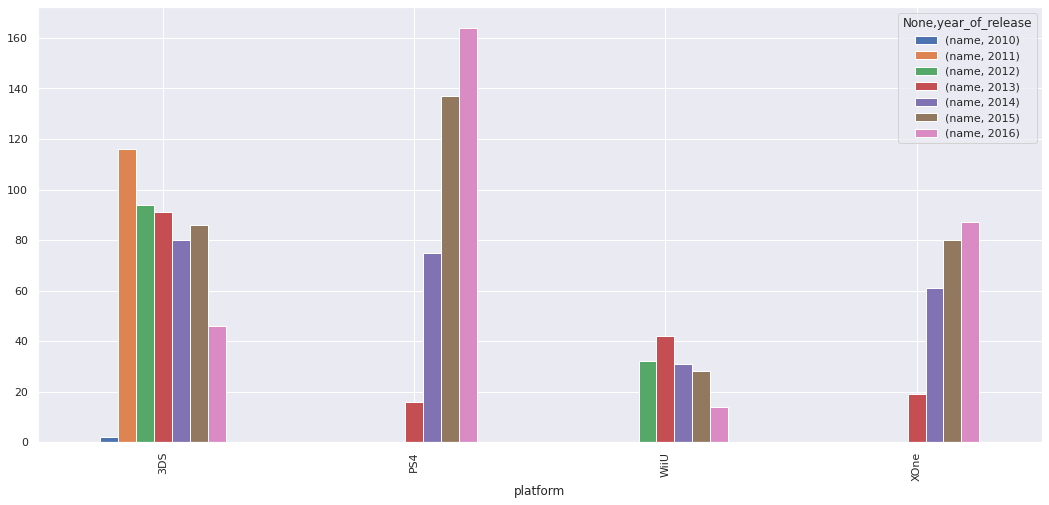

In [61]:
(data[(data['platform'].isin(['PS4', 'WiiU', 'XOne', '3DS']))]
 .pivot_table('name',['platform','year_of_release'], aggfunc='count')
 .unstack()
 .plot(kind='bar')
);

##### **Вывод:**
Количество игр растёт на платформах PS4 и XOne, в отличии от 3DS и WiiU

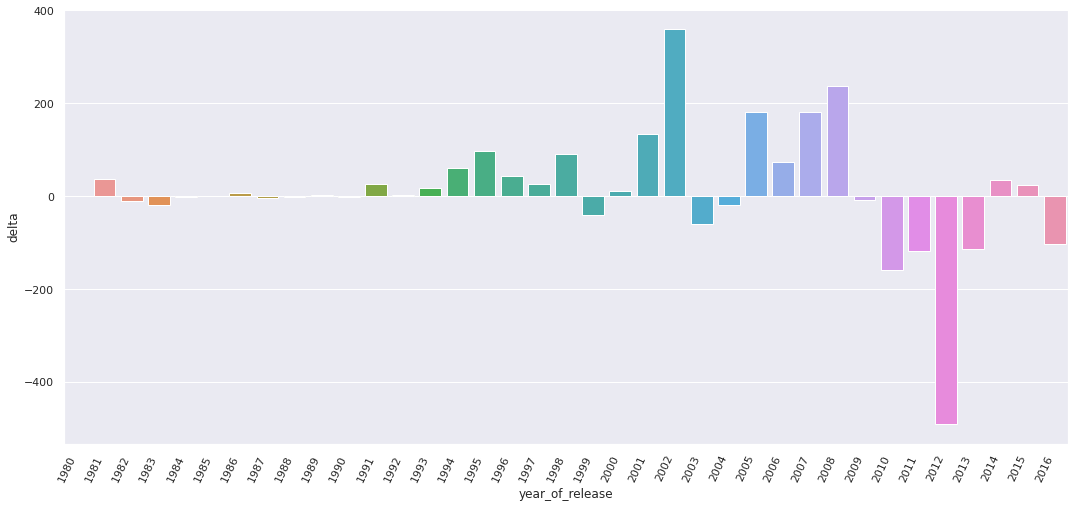

In [62]:
temp = (data.pivot_table('name',['year_of_release'], aggfunc='count'))


temp_delta = data.pivot_table('name',['year_of_release'], aggfunc = 'count')
b = temp_delta.T.to_dict()
temp_dict = {x: b[x]['name'] - b[x-1]['name'] for x in b if x > 1980}
temp_dict[1980] = 0
temp_delta['delta'] = temp_delta.apply(lambda x: x.index)
temp_delta['delta'] = temp_delta['delta'].apply(lambda x: temp_dict[x])

sns.barplot(x=temp_delta.index, y = 'delta', data = temp_delta);
plt.xticks(rotation=65, horizontalalignment='right');

In [63]:
print('среднее - ',int(temp.loc[2012:2016].mean()))
print('стандарное отклонение - ',int(temp.loc[2012:2016].std()))

среднее -  579
стандарное отклонение -  60


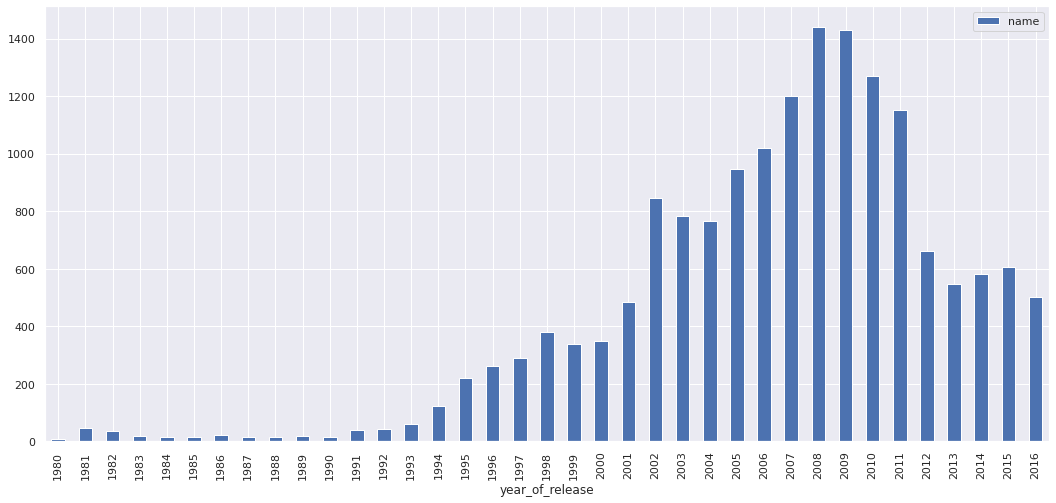

In [64]:
(data
 .pivot_table('name',['year_of_release'], aggfunc='count')
 .plot(kind='bar')
);

##### **Вывод:**
Тенденция 2001 года потерпела крах в 2012 году, когда общее количество игр сократилось вдвое; новая тенденция возникла в 2013 году и продолжилась в сторону уменьшения. Производители игр, вероятно, выбрали новый путь: от количественных к качественным измерениям игр.



##### График «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах

#### Проанализируем данные по продажам игр разных платформ за актуальный период:

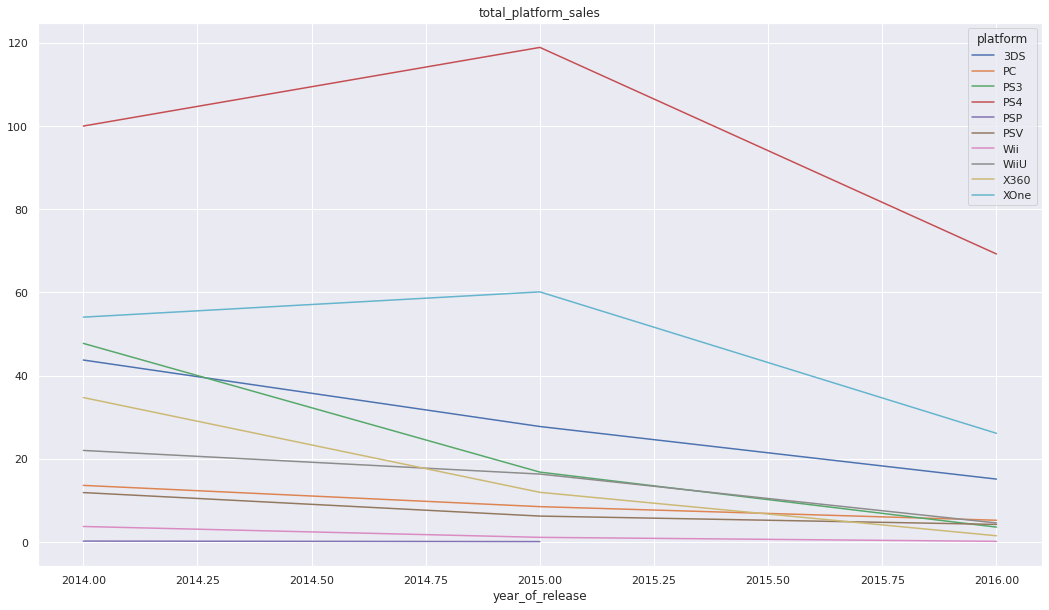

In [69]:
(data
    .query('year_of_release >= 2014')
    .pivot_table(index='year_of_release', columns='platform', values='revenue', aggfunc='sum')
    .plot(title='total_platform_sales', grid=True, figsize=(18, 10)));

Из полученного графика видим, что к концу 2016 г. наблюдается общая динамика спада продаж по всем платформам, при этом три платформы явно лидируют по продажам и являются потенциально прибыльными на 2017 г: 

In [70]:
perspective_platforms = (data
                 .query('year_of_release == 2016')
                 .pivot_table(index='platform', values='revenue', aggfunc='sum')
                 .sort_values(by='revenue', ascending=False).head(3))
perspective_platforms

,revenue
platform,
PS4,69.25
XOne,26.15
3DS,15.14


##### **Вывод:**
За актуальный период по продажам игр на разных платформах преимущество берут 3 платформы:  


*   PS4
*   XOne

*   3DS






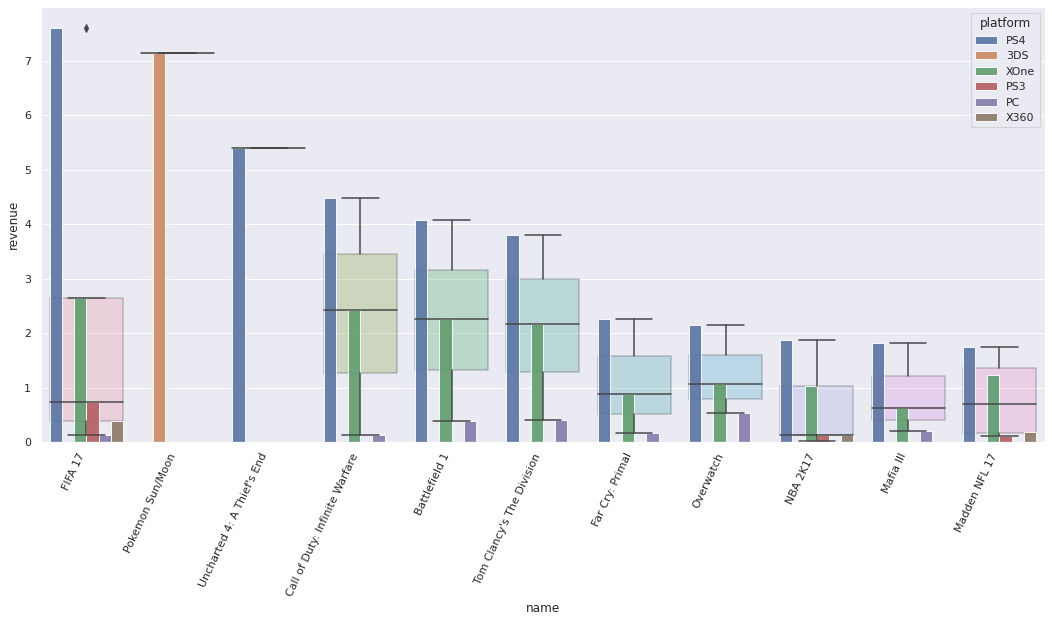

In [71]:
ax = sns.boxplot(x='name',y='revenue',data=data_2016,boxprops=dict(alpha=.3))
plt.xticks(rotation=65, horizontalalignment='right');
ax = sns.barplot(x='name',y='revenue', hue = 'platform', data=data_2016, alpha=.9)                
                 
                 
                 
                 



##### **Вывод:**
Топ-3 игры: Fifa 17, Pokemon Sun/Moon, Uncharted 4 - из графика можно сделать вывод, что PS4, 3DS и XOne являются топовыми платформами, так как именно эти игры имеют самые высокие показатели продаж; ПК - платформа с большим сроком службы, но никто не собирается от нее отказываться, так как она ассоциируется со многими другими возможностями! В этом есть смысл.

##### Построим график со всеми выбросами: 

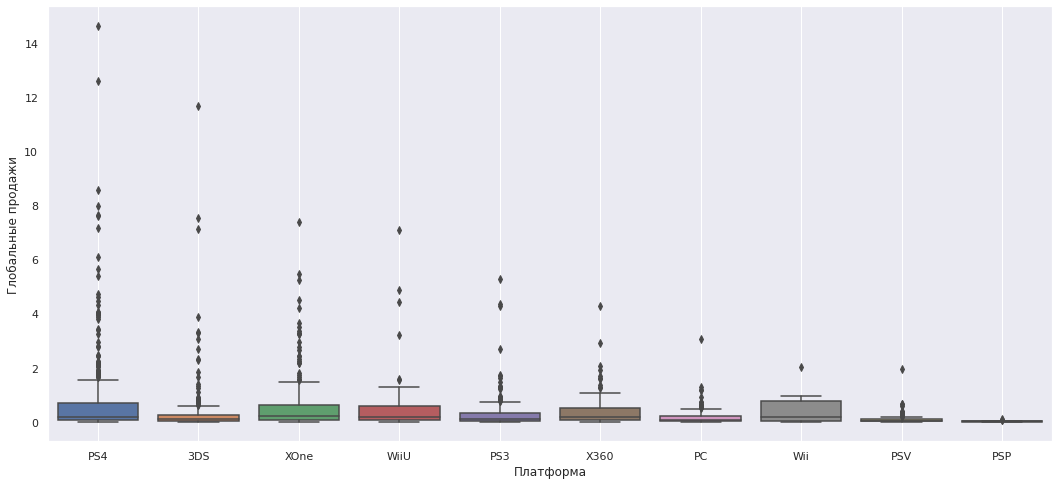

In [72]:
sns.boxplot(x='platform', y='revenue', data=data.query('year_of_release >= 2014'))
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.grid();
   







##### Для наглядности изменим масштаб графика, ограничив пределы по вертикали:

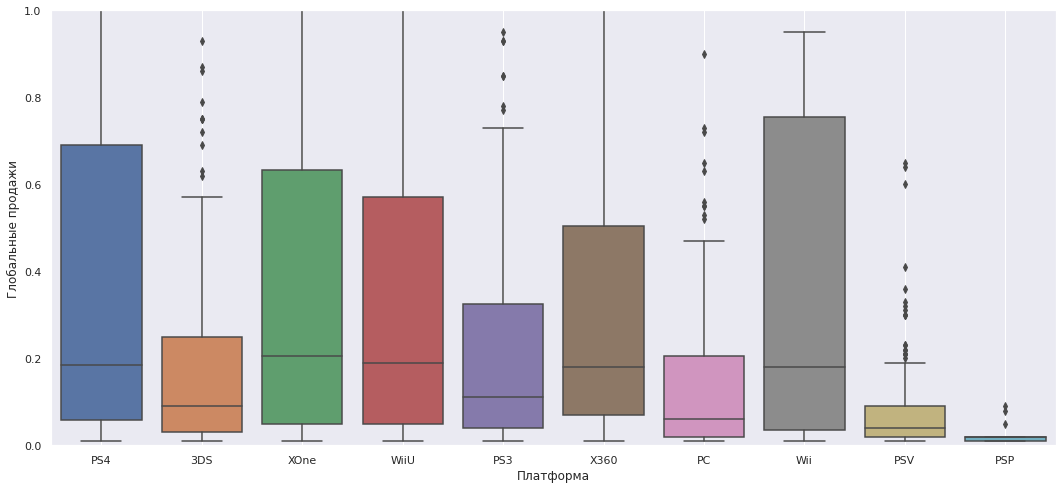

In [73]:
sns.boxplot(x='platform', y='revenue', data=data.query('year_of_release >= 2014'))
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.ylim([0,1])
plt.grid();

##### Посмотрим на границы размахов и медианные значения суммарных продаж по платформам:

In [74]:
data.query('year_of_release >= 2014').pivot_table(index='platform', values = 'revenue', aggfunc = ['describe'])

describe                                                       
              25%    50%     75%  count    max      mean   min       std
platform                                                                
3DS        0.0300  0.090  0.2500  212.0  11.68  0.408868  0.01  1.188368
PC         0.0200  0.060  0.2050  152.0   3.05  0.180263  0.01  0.328559
PS3        0.0400  0.110  0.3250  219.0   5.27  0.311324  0.01  0.633059
PS4        0.0575  0.185  0.6900  376.0  14.63  0.766356  0.01  1.614969
PSP        0.0100  0.020  0.0200   13.0   0.09  0.027692  0.01  0.027735
PSV        0.0200  0.040  0.0900  295.0   1.96  0.075932  0.01  0.141591
Wii        0.0350  0.180  0.7550   11.0   2.01  0.460909  0.01  0.625451
WiiU       0.0500  0.190  0.5700   73.0   7.09  0.588767  0.01  1.161467
X360       0.0700  0.180  0.5050  111.0   4.28  0.434414  0.01  0.628967
XOne       0.0500  0.205  0.6325  228.0   7.39  0.615614  0.01  1.046513

Из графиков и численных значений видим, что размахи продаж сильно отличаются на разных платформах, при этом медианные значения в среднем примерно на одном уровне 0,1 - 0,2 млн копий. Большое количество выбросов на определенных платформах говорит о том, что у некоторых игр этих платформ были большие продажи.

##### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.

Оценки критиков и пользовательские коррелируют,т.е. есть сильная зависимость, поэтому сделаем общий столбец в котором отобразим усредненную оценку

In [75]:
def func(row):
    user = row['user_score']*10
    critic = row['critic_score']
    if user==0:
        return critic
    elif critic==0:
        return user
    else:
        return (user+critic)/2
    
def temp_func(platforms):
    data['mean_score'] = data.apply(func,axis=1)

    temp = data.query('year_of_release >= 2014\
                                and platform ==@platforms\
                                and user_score > 0\
                                and critic_score > 0').reset_index(drop=True)


    fig, axis = plt.subplots(2,2, figsize=(18,10))
    sns.heatmap(temp.loc[:,['revenue', 'mean_score', 'user_score', 'critic_score']].corr(),annot=True,ax=axis[0,0]);      
    sns.scatterplot(x='mean_score',y='revenue',hue = 'mean_score',size = 'mean_score',sizes = (20,200),data=temp,ax=axis[0,1]);
    sns.scatterplot(x='user_score',y='revenue',hue = 'critic_score',size = 'critic_score',sizes = (20,200), data=temp,ax=axis[1,0] );
    sns.scatterplot(x='critic_score',y='revenue',hue = 'user_score',size = 'user_score',sizes = (20,200), data=temp,ax=axis[1,1]);


/tmp/ipykernel_48/972496154.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mean_score'] = data.apply(func,axis=1)


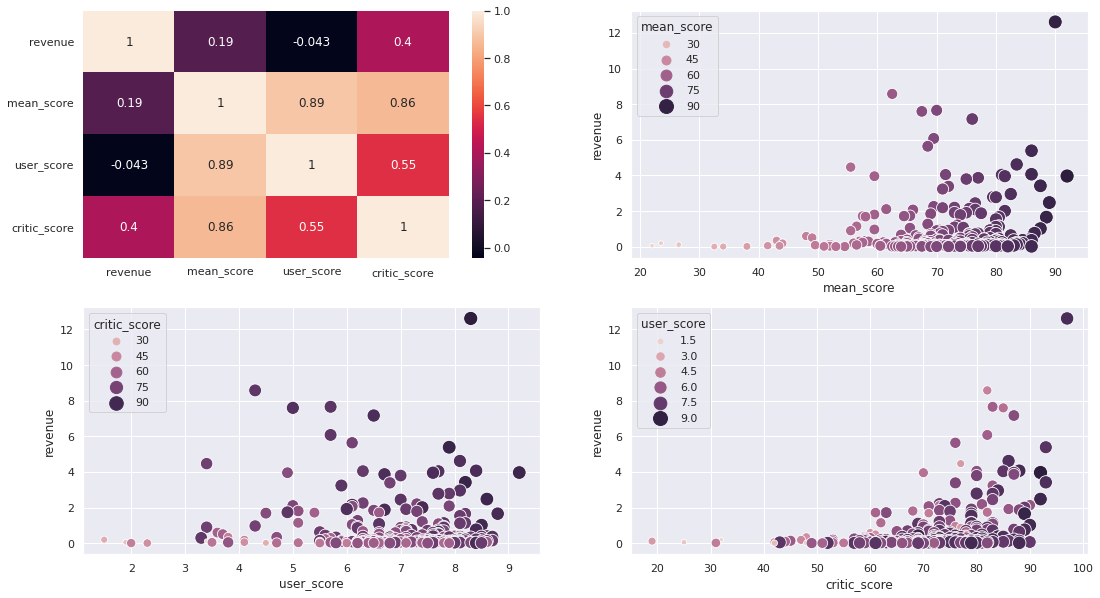

In [76]:
temp_func('PS4')


Для платформы PS4 корреляция между продажами и отзывами пользователей составляет: -0,043 -  очень слабая, отрицательная, в то же время оценки критиков коррелируют: 0,4 - слабая корреляция, положительная, средние отзывы слабо коррелируют из-за различий в корреляции для конкретной платформы.

/tmp/ipykernel_48/972496154.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mean_score'] = data.apply(func,axis=1)


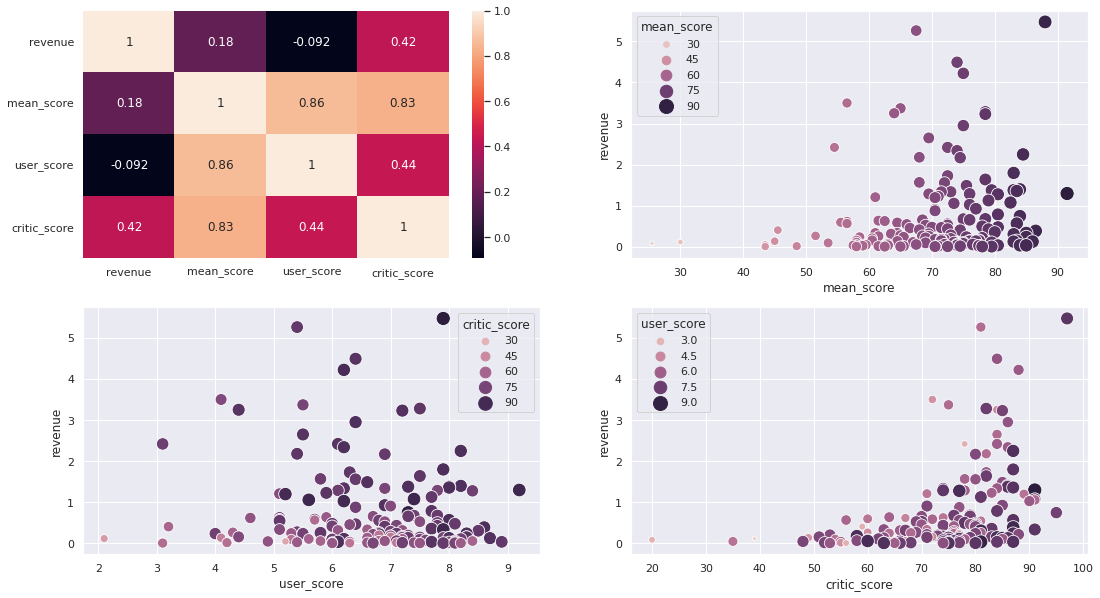

In [77]:
temp_func('XOne')

Для платформы XOne корреляция между продажами и отзывами пользователей составляет: -0,092 - очень слабая, отрицательная, в то же время оценки критиков коррелируют: 0,42 - слабая корреляция, положительная, средние отзывы коррелируют слабо из-за различий в корреляции для конкретных платформ.

/tmp/ipykernel_48/972496154.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mean_score'] = data.apply(func,axis=1)


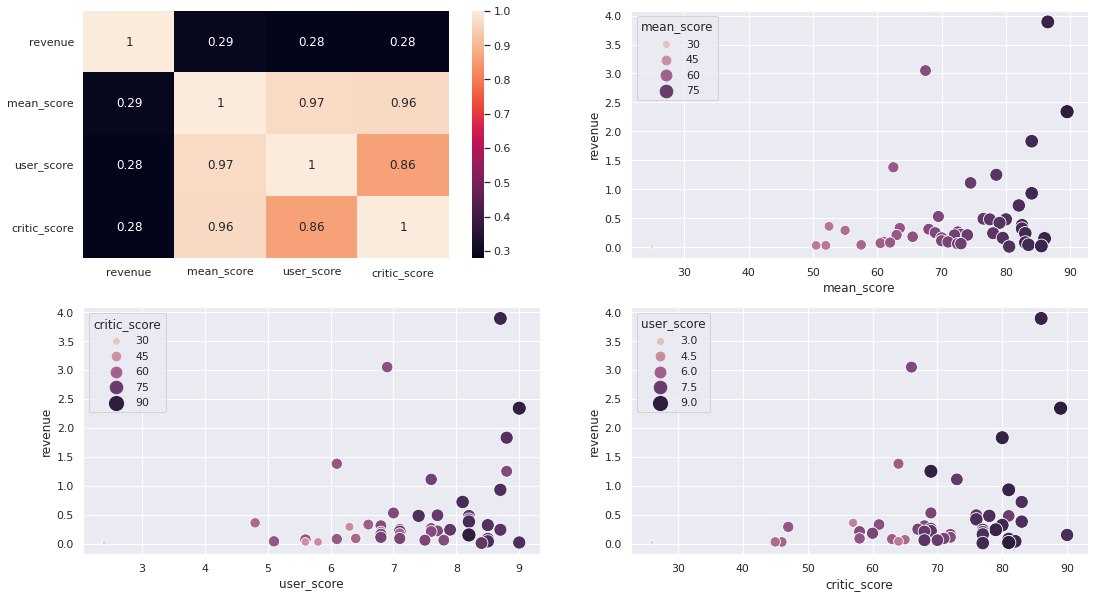

In [78]:
temp_func('3DS')

Для платформы 3DS корреляция между продажами и отзывами пользователей составляет: 0,28 - слабая корреляция, положительная; в то же время отзывы критиков составляют: 0,28 - слабая корреляция, положительная; средние отзывы имеют слабую корреляцию, поскольку они смещены к пользовательского сегменту.


##### **Вывод:**
Корреляционная зависимость между отзывами пользователей,критиков и продажами есть, но слабо выраженая. Например у самой кассовой игры 2016 года - fifa 17, далеко не самый высокий показатель. Есть игры, отзывы которых высокие, но продажи среднии. Тут с моей точки зрения нужны более свежии данные с более высоким уровнем качества.

##### **Итог корреляционного анализа для топ-3 платформ:**

* Для платформы PS4 корреляция между продажами и отзывами пользователей составляет: -0,043 -  очень слабая, отрицательная, в то же время оценки критиков коррелируют: 0,4 - слабая корреляция, положительная, средние отзывы слабо коррелируют из-за различий в корреляции для конкретной платформы.
* Для платформы XOne корреляция между продажами и отзывами пользователей составляет: -0,092 - очень слабая, отрицательная, в то же время оценки критиков коррелируют: 0,42 - слабая корреляция, положительная, средние отзывы коррелируют слабо из-за различий в корреляции для конкретных платформ.
* Для платформы 3DS корреляция между продажами и отзывами пользователей составляет: 0,28 - слабая корреляция, положительная; в то же время отзывы критиков составляют: 0,28 - слабая корреляция, положительная; средние отзывы имеют слабую корреляцию, поскольку они смещены к пользовательского сегменту.

Таким образом, отзывы пользователей в основном слабо коррелируют и в отрицательном направлении, в отличие от отзывов критиков, которые здесь также показывают слабую корреляцию от 0,28 до 0,42. Среднее значение отзывов не выявляет корреляции между отзывами и продажами, так как оно постоянно колеблется. Таким образом, критики предсказывают успех игры более точно, чем пользователи. Конечно, этот вывод немного странный, но с моей точки зрения он заслуживает дальнейшего анализа.

## Вывод:
##### Ответ - вопрос:

1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
    * *До 1994 года для каждой платформы выпускалось не более 50 игр в год, с 1994 года количество игр для платформы начало расти и удвоилось в пятилетней тенденции, но в 2008 году  было выпущено 1430 игр, с 2009 года их количество начало снижаться, а в 2012 году - вдвое больше, чем в 2011 году - зафиксирована тенденция к снижению, среднегодовое количество -579+/-60 игр.*
2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
    * *Средний срок жизни платформы - 7 лет*
3. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
    * *Предварительный - да, но не зватает дополнительных данных активность игроков на платформе.*  
4. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.  
     *За актуальный период по продажам игр на разных платформах преимущество берут 3 платформы:*


*   PS4
*   XOne

*   3DS
5. Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.
    * Из графиков и численных значений видим, что размахи продаж сильно отличаются на разных платформах, при этом медианные значения в среднем примерно на одном уровне 0,1 - 0,2 млн копий. Большое количество выбросов на определенных платформах говорит о том, что у некоторых игр этих платформ были большие продажи.
6. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
    * Корреляционная зависимость между отзывами пользователей,критиков и продажами есть, но слабо выраженая. Например у самой кассовой игры 2016 года - Fifa 17, далеко не самый высокий показатель. Есть игры, отзывы которых высокие, но продажи среднии. Тут с моей точки зрения нужны более свежии данные с более высоким уровнем качества.
    * Для платформы PS4 корреляция между продажами и отзывами пользователей составляет: -0,12 - слабая, отрицательная, в то же время оценки критиков коррелируют: 0,38 - умеренная корреляция, положительная, средние отзывы слабо коррелируют из-за различий в корреляции для конкретной платформы.
    * Для платформы XOne корреляция между продажами и отзывами пользователей составляет: -0,18 - слабая, отрицательная, в то же время оценки критиков коррелируют: 0,41 - умеренная корреляция, положительная, средние отзывы коррелируют слабо из-за различий в корреляции для конкретных платформ.
    * Для платформы 3DS корреляция между продажами и отзывами пользователей составляет: 0,41 - умеренная корреляция, положительная; в то же время отзывы критиков составляют: 0,34 - умеренная корреляция, положительная; средние отзывы имеют умеренную корреляцию, поскольку они смещены к пользовательского сегменту.  
    * Таким образом, отзывы пользователей в основном слабо коррелируют и в отрицательном направлении, в отличие от отзывов критиков, которые здесь также показывают среднюю корреляцию от 0,34 до 0,41. Среднее значение отзывов не выявляет корреляции между отзывами и продажами, так как оно постоянно колеблется. Таким образом, критики предсказывают успех игры более точно, чем пользователи. Конечно, этот вывод немного странный, но с моей точки зрения он заслуживает дальнейшего анализа.
    
    
    
7. Соотнесите выводы с продажами игр на других платформах.
    * Игровая индустрия очень быстро изменяется;
    * Тренд выручки нисходящий;
    * Топ платформы: PS4, WiiU, XOne, 3DS;
    
8. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
    * Топовые жанры: Shooters, Sports, Role-playing - 2016 и 2015 годов.
    * Топ-низ жанры: Adventure, Puzzle

## Портрет пользователя каждого региона (шаг 4)
___Определить для пользователя каждого региона (NA, EU, JP):___
1. Самые популярные платформы (топ-5). Опишите различия в долях продаж.
2. Самые популярные жанры (топ-5). Поясните разницу.
3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [79]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue,mean_score
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,78.0
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,tbd,40.24,0.0
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,82.5
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,80.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,tbd,31.38,0.0


Рассмотрим только 2016 год

In [80]:
data_2016 = data.query('year_of_release == 2016')

In [81]:
stat_data_2016 = data_2016\
            .pivot_table(['na_sales','eu_sales','jp_sales','other_sales','revenue'], ['platform'], aggfunc='sum')\
            .sort_values(by='na_sales', ascending=False)

def func(row):
      
    row.eu_sales = round(row.eu_sales/row.revenue,2)
    row.jp_sales = round(row.jp_sales/row.revenue,2)
    row.na_sales = round(row.na_sales/row.revenue,2)
    row.other_sales = round(row.other_sales/row.revenue,2)
    return row
    
stat_data_2016_delta = stat_data_2016.copy()
stat_data_2016_delta = stat_data_2016_delta.apply(func, axis=1)
stat_data_2016_delta

,eu_sales,jp_sales,na_sales,other_sales,revenue
platform,,,,,
PS4,0.46,0.08,0.31,0.15,69.25
XOne,0.37,0.00,0.55,0.09,26.15
3DS,0.15,0.53,0.27,0.04,15.14
WiiU,0.32,0.15,0.46,0.08,4.60
PC,0.67,0.00,0.26,0.07,5.25
X360,0.47,0.00,0.45,0.08,1.52
PS3,0.35,0.36,0.19,0.10,3.60
PSV,0.09,0.84,0.04,0.04,4.25
Wii,0.61,0.00,0.33,0.06,0.18


In [82]:
stat_data_2016

,eu_sales,jp_sales,na_sales,other_sales,revenue
platform,,,,,
PS4,31.78,5.74,21.49,10.24,69.25
XOne,9.63,0.01,14.27,2.24,26.15
3DS,2.33,8.03,4.14,0.64,15.14
WiiU,1.48,0.67,2.10,0.35,4.60
PC,3.53,0.00,1.36,0.36,5.25
X360,0.71,0.00,0.69,0.12,1.52
PS3,1.26,1.30,0.67,0.37,3.60
PSV,0.39,3.56,0.15,0.15,4.25
Wii,0.11,0.00,0.06,0.01,0.18


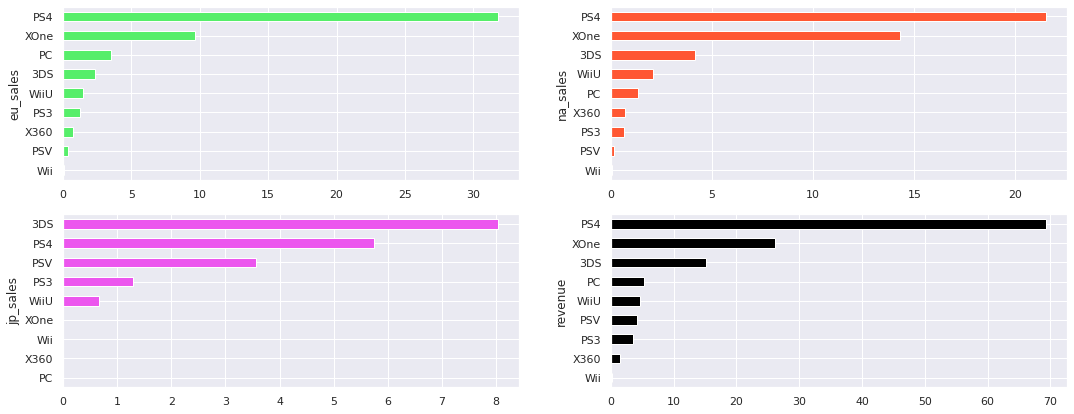

In [83]:
fig, axis = plt.subplots(2,2, figsize=(18,7))

stat_data_2016['eu_sales'].sort_values(ascending=True).plot.barh(ax=axis[0,0], color = '#56EE6A').set(ylabel='eu_sales');
stat_data_2016['na_sales'].sort_values(ascending=True).plot.barh(ax=axis[0,1], color = '#FF5733').set(ylabel='na_sales');
stat_data_2016['jp_sales'].sort_values(ascending=True).plot.barh(ax=axis[1,0], color = '#EC56EE').set(ylabel='jp_sales');
stat_data_2016['revenue'].sort_values(ascending=True).plot.barh(ax=axis[1,1], color = 'black').set(ylabel='revenue');



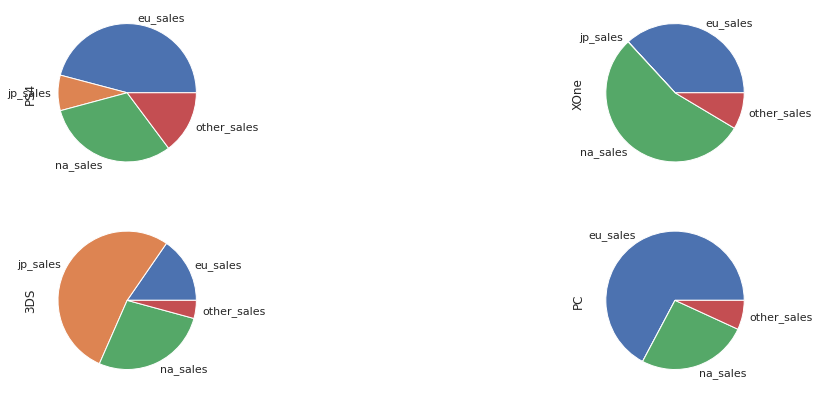

In [84]:
fig, axis = plt.subplots(2,2, figsize=(18,7))
stat_data_2016.loc['PS4',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axis[0,0]);
stat_data_2016.loc['XOne',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axis[0,1]);
stat_data_2016.loc['3DS',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axis[1,0]);
stat_data_2016.loc['PC',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axis[1,1]);

#### Вывод:
##### 1. Самые популярные платформы (топ-5)
    1. EU: PS4, XOne, PC, 3DS, WiiU - Европа
    2. JP: 3DS, PS4, PSV, PS3, WiiU - Япония
    3. NA: PS4, XOne, 3DS, WiiU, PC - CША
2. Самые популярные жанры (топ-5). Поясните разницу.
3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

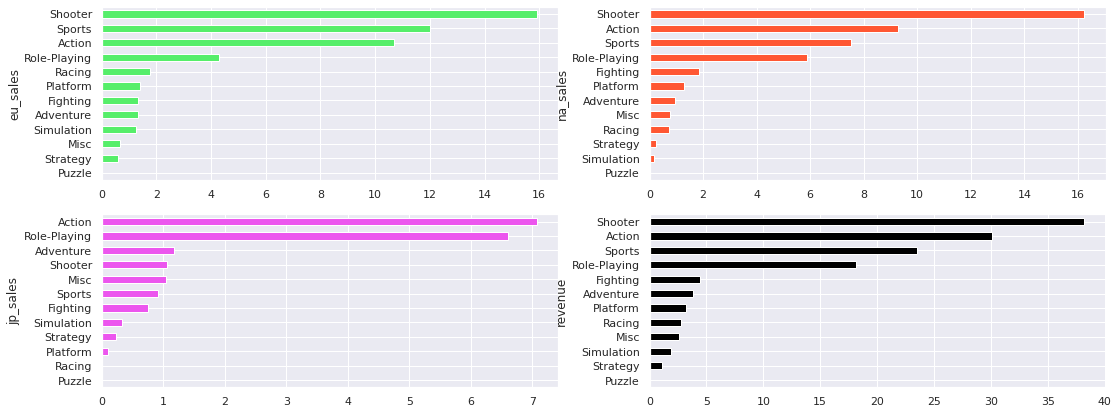

In [85]:
stat_data_2016_g = data_2016\
            .pivot_table(['na_sales','eu_sales','jp_sales','other_sales','revenue'], ['genre'], aggfunc='sum')\
            .sort_values(by='na_sales', ascending=False)

fig, axis = plt.subplots(2,2, figsize=(18,7))

stat_data_2016_g['eu_sales'].sort_values(ascending=True).plot.barh(ax=axis[0,0], color = '#56EE6A').set(ylabel='eu_sales');
stat_data_2016_g['na_sales'].sort_values(ascending=True).plot.barh(ax=axis[0,1], color = '#FF5733').set(ylabel='na_sales');
stat_data_2016_g['jp_sales'].sort_values(ascending=True).plot.barh(ax=axis[1,0], color = '#EC56EE').set(ylabel='jp_sales');
stat_data_2016_g['revenue'].sort_values(ascending=True).plot.barh(ax=axis[1,1], color = 'black').set(ylabel='revenue');

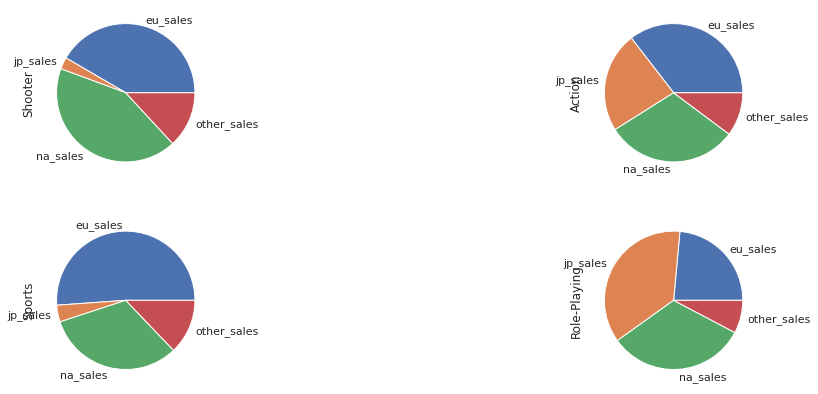

In [86]:
fig, axis = plt.subplots(2,2, figsize=(18,7))
stat_data_2016_g.loc['Shooter',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axis[0,0]);
stat_data_2016_g.loc['Action',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axis[0,1]);
stat_data_2016_g.loc['Sports',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axis[1,0]);
stat_data_2016_g.loc['Role-Playing',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axis[1,1]);

#### **Вывод:**
1. __Самые популярные платформы (топ-5).__
    1. EU: PS4, XOne, PC, 3DS, WiiU - Европа
    2. JP: 3DS, PS4, PSV, PS3, WiiU - Япония
    3. NA: PS4, XOne, 3DS, WiiU, PC - CША
    
    
2. __Самые популярные жанры (топ-5)__
    1. EU: Shooter, Sports, Action, Role-Playing, Racing - Европа
    2. JP: Action, Role-Playing, Adventure, Shooter, Misc - Япония
    3. NA: Shooter, Action, Sports, Role-Playing, Fighting - CША


3. __Влияет ли рейтинг ESRB на продажи в отдельном регионе?__

#### Влияние рейтинга ESRB на продажи в отдельном регионе

In [87]:
data_2016.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue,mean_score
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60,67.5
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,0.0,0.0,tbd,7.14,0.0
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39,86.0
245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47,55.5
289,Battlefield 1,PS4,2016,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,4.07,86.0


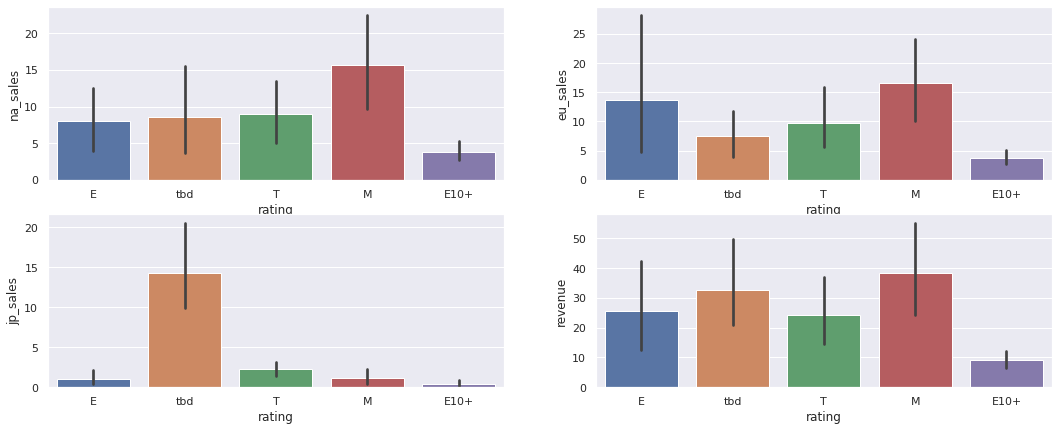

In [88]:
fig, axis = plt.subplots(2,2, figsize=(18,7))
sns.barplot(y='na_sales', x='rating', data = data_2016,estimator=sum, ax=axis[0,0]);
sns.barplot(y='eu_sales', x='rating', data = data_2016,estimator=sum, ax=axis[0,1]);
sns.barplot(y='jp_sales', x='rating', data = data_2016,estimator=sum, ax=axis[1,0]);
sns.barplot(y='revenue', x='rating', data = data_2016,estimator=sum, ax=axis[1,1]);

#### **Вывод:**
1. **Самые популярные платформы (топ-5).**
    1. EU: PS4, XOne, PC, 3DS, WiiU - Европа
    2. JP: 3DS, PS4, PSV, PS3, WiiU - Япония
    3. NA: PS4, XOne, 3DS, WiiU, PC - CША
    
    
2. **Самые популярные жанры (топ-5)**
    1. EU: Shooter, Sports, Action, Role-Playing, Racing - Европа
    2. JP: Action, Role-Playing, Adventure, Shooter, Misc - Япония
    3. NA: Shooter, Action, Sports, Role-Playing, Fighting - CША


3. __Влияет ли рейтинг ESRB на продажи в отдельном регионе?__
    1. Да, влияние есть, и это проявляется на графике, кроме региона - Япония, здесь сумарные продажи у игр без рейтинга выше.

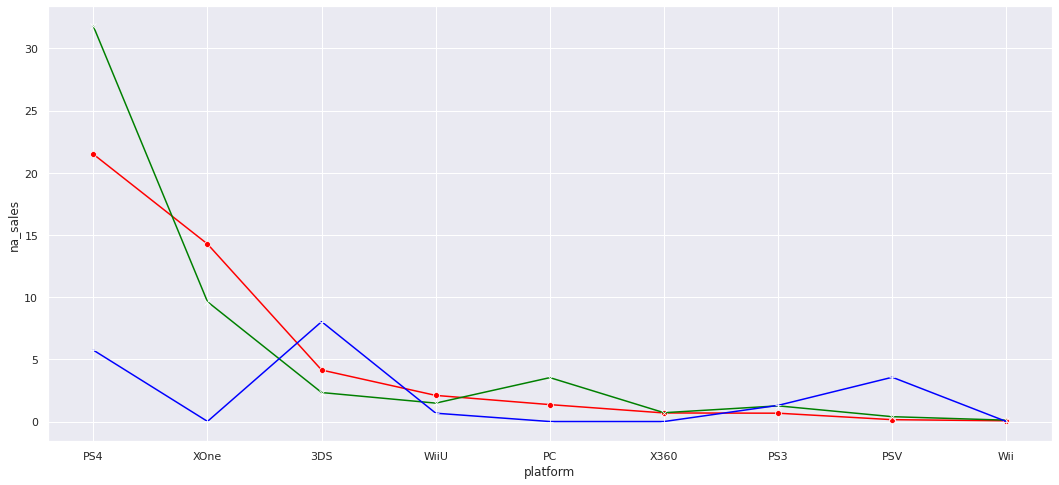

In [89]:
sns.lineplot(x=stat_data_2016.index, y='na_sales', data=stat_data_2016, color = 'red', marker='o');
sns.lineplot(x=stat_data_2016.index, y='eu_sales', data=stat_data_2016, color = 'green', marker='x');
sns.lineplot(x=stat_data_2016.index, y='jp_sales', data=stat_data_2016, color = 'blue', marker='+');

##### Оценим медианные и суммарные продажи по платформам для каждого региона:

In [90]:
(data
    .query('year_of_release >= 2014')
    .pivot_table(index='platform', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc=['median', 'sum'])
)

median                        sum                  
         eu_sales jp_sales na_sales eu_sales jp_sales na_sales
platform                                                      
3DS          0.00    0.055     0.00    16.12    44.24    22.64
PC           0.05    0.000     0.00    18.22     0.00     7.29
PS3          0.01    0.020     0.02    25.54    11.22    22.05
PS4          0.07    0.015     0.05   130.04    15.02    98.61
PSP          0.00    0.020     0.00     0.00     0.36     0.00
PSV          0.00    0.030     0.00     3.53    14.54     2.52
Wii          0.12    0.000     0.04     2.59     0.00     2.08
WiiU         0.06    0.010     0.09    13.15     7.31    19.36
X360         0.05    0.000     0.10    15.49     0.08    28.30
XOne         0.07    0.000     0.10    46.25     0.32    81.27

##### Определим топ-5 самых продаваемых платформ в Северной Америке:

In [91]:
top_platform_na = (data
              .query('year_of_release >= 2014')
              .pivot_table(index='platform', values='na_sales', aggfunc='sum')
              .sort_values(by='na_sales', ascending=False).head(5))
top_platform_na

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


##### Определим топ-5 самых продаваемых платформ в Европе:

In [92]:
top_platform_eu = (data
              .query('year_of_release >= 2014')
              .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
              .sort_values(by='eu_sales', ascending=False).head(5))
top_platform_eu

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,18.22
3DS,16.12


##### Определим топ-5 самых продаваемых платформ в Японии:

In [93]:
top_platform_jp = (data
              .query('year_of_release >= 2014')
              .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
              .sort_values(by='jp_sales', ascending=False).head(5))
top_platform_jp

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


##### Оценим различия между регионами в долях продаж по топ-5 платформам:

In [94]:
pivot_top_platform = (data
    .query('year_of_release >= 2014')
    .pivot_table(index='platform', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
)
pivot_top_platform

,eu_sales,jp_sales,na_sales
platform,,,
3DS,16.12,44.24,22.64
PC,18.22,0.00,7.29
PS3,25.54,11.22,22.05
PS4,130.04,15.02,98.61
PSP,0.00,0.36,0.00
PSV,3.53,14.54,2.52
Wii,2.59,0.00,2.08
WiiU,13.15,7.31,19.36
X360,15.49,0.08,28.30


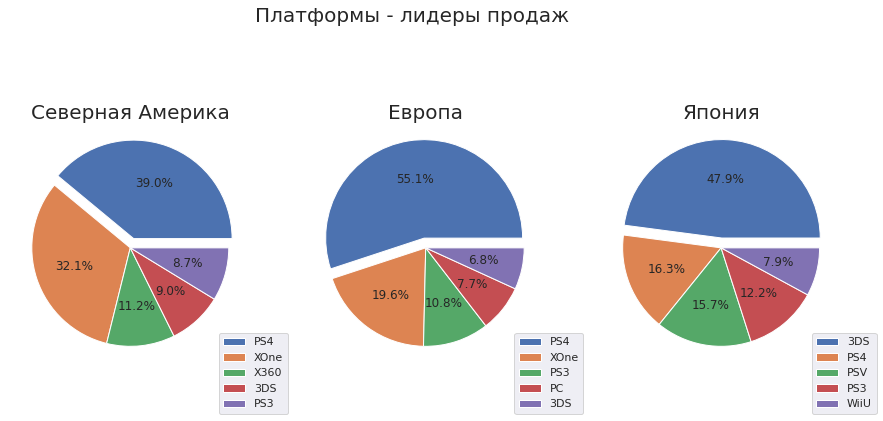

In [95]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Платформы - лидеры продаж', fontsize=20)
plt.subplot(1, 3, 1)
pivot_top_platform.na_sales.sort_values(ascending = False).head(5).plot(kind='pie', autopct='%1.1f%%', explode=(0.1,0,0,0,0), labeldistance=None)
plt.title('Северная Америка', fontsize=20)
plt.legend(loc='center', bbox_to_anchor=(1.0,-0.01))
plt.ylabel('')
 
plt.subplot(1, 3, 2)
pivot_top_platform.eu_sales.sort_values(ascending = False).head(5).plot(kind='pie', autopct='%1.1f%%', explode=(0.1,0,0,0,0), labeldistance=None)
plt.title('Европа', fontsize=20)
plt.legend(loc='center', bbox_to_anchor=(1.0,-0.01))
plt.ylabel('')
 
plt.subplot(1, 3, 3)
pivot_top_platform.jp_sales.sort_values(ascending = False).head(5).plot(kind='pie', autopct='%1.1f%%', explode=(0.1,0,0,0,0), legend=True, labeldistance=None)
plt.title('Япония', fontsize=20)
plt.legend(loc='center', bbox_to_anchor=(1.0,-0.01))
plt.ylabel('');

Проанализоровав данные графиков и численные значения объемов продаж, получили следующие наблюдения:  
Платформы - лидеры продаж существенно отличаются в зависимости от региона. В Северной Америке и Европе самые популярные платформы PS4 и XOne, в Японии - 3DS и PS4, при этом игры платформы 3DS составляют почти половину от всех продаж ТОП-5 платформ в Японии, а игры платформы Xone (одного из лидеров рынка Северной Америки и Европы) - в Японии практически не продаются.

#### Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5):

##### Оценим медианные и суммарные продажи по жанры для каждого региона:

In [96]:
(data
    .query('year_of_release >= 2014')
    .pivot_table(index='genre', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc=['median', 'sum'])
)

median                        sum                  
             eu_sales jp_sales na_sales eu_sales jp_sales na_sales
genre                                                             
Action          0.020     0.01    0.010    74.93    29.58    72.59
Adventure       0.000     0.01    0.000     6.49     3.60     5.64
Fighting        0.020     0.03    0.040     6.69     6.37    12.43
Misc            0.010     0.01    0.010    12.86     5.61    15.05
Platform        0.055     0.00    0.075     6.80     2.69     6.79
Puzzle          0.000     0.03    0.000     0.52     0.93     0.65
Racing          0.050     0.00    0.030    14.13     1.76     8.74
Role-Playing    0.010     0.05    0.020    28.17    31.16    33.47
Shooter         0.220     0.00    0.220    65.52     4.87    79.02
Simulation      0.030     0.00    0.000     7.30     2.31     2.63
Sports          0.050     0.00    0.070    45.73     3.26    46.13
Strategy        0.010     0.00    0.000     1.79     0.95     0.98

##### Определим топ-5 самых продаваемых жанров в Северной Америке:

In [97]:
top_genre_na = (data
              .query('year_of_release >= 2014')
              .pivot_table(index='genre', values='na_sales', aggfunc='sum')
              .sort_values(by='na_sales', ascending=False).head(5))
top_genre_na

,na_sales
genre,
Shooter,79.02
Action,72.59
Sports,46.13
Role-Playing,33.47
Misc,15.05


##### Определим топ-5 самых продаваемых жанров в Европе:

In [98]:
top_genre_eu = (data
              .query('year_of_release >= 2014')
              .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
              .sort_values(by='eu_sales', ascending=False).head(5))
top_genre_eu

,eu_sales
genre,
Action,74.93
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


##### Определим топ-5 самых продаваемых жанров в Японии:

In [99]:
top_genre_jp = (data
              .query('year_of_release >= 2014')
              .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
              .sort_values(by='jp_sales', ascending=False).head(5))
top_genre_jp

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


##### Оценим различия между регионами в долях продаж по топ-5 жанрам:

In [100]:
pivot_top_genre = (data
    .query('year_of_release >= 2014')
    .pivot_table(index='genre', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
)
pivot_top_genre

,eu_sales,jp_sales,na_sales
genre,,,
Action,74.93,29.58,72.59
Adventure,6.49,3.60,5.64
Fighting,6.69,6.37,12.43
Misc,12.86,5.61,15.05
Platform,6.80,2.69,6.79
Puzzle,0.52,0.93,0.65
Racing,14.13,1.76,8.74
Role-Playing,28.17,31.16,33.47
Shooter,65.52,4.87,79.02


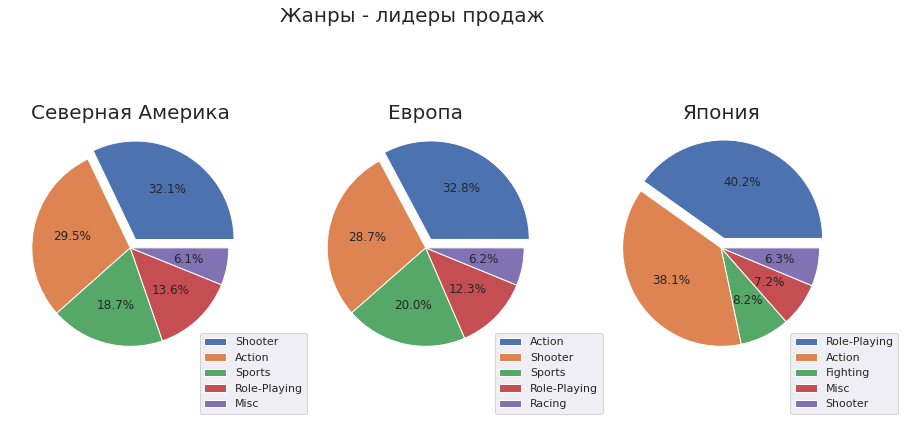

In [101]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Жанры - лидеры продаж', fontsize=20)
plt.subplot(1, 3, 1)
pivot_top_genre.na_sales.sort_values(ascending = False).head(5).plot(kind='pie', autopct='%1.1f%%', explode=(0.1,0,0,0,0), labeldistance=None)
plt.title('Северная Америка', fontsize=20)
plt.legend(loc='center', bbox_to_anchor=(1.0,-0.01))
plt.ylabel('')
 
plt.subplot(1, 3, 2)
pivot_top_genre.eu_sales.sort_values(ascending = False).head(5).plot(kind='pie', autopct='%1.1f%%', explode=(0.1,0,0,0,0), labeldistance=None)
plt.title('Европа', fontsize=20)
plt.legend(loc='center', bbox_to_anchor=(1.0,-0.01))
plt.ylabel('')
 
plt.subplot(1, 3, 3)
pivot_top_genre.jp_sales.sort_values(ascending = False).head(5).plot(kind='pie', autopct='%1.1f%%', explode=(0.1,0,0,0,0), legend=True, labeldistance=None)
plt.title('Япония', fontsize=20)
plt.legend(loc='center', bbox_to_anchor=(1.0,-0.01))
plt.ylabel('');

Проанализировав данные графиков и численные значения объемов продаж, получили следующие наблюдения:  
Рынки продаж в Северной Америке и Европе совпадают по ТОП-5 жанрам,  и существенно отличаются рынка Японии. В Северной Америке и Европе самые популярные жанры Action и Shooter, а в Японии - Role-Playing и Action, при этом игры жанра Sports (одного из лидеров рынков Северной Америки и Европы) - в Японии продаются очень мало.

#### Оценим, как влияет рейтинг ESRB на продажи в отдельном регионе:

In [102]:
pivot_category = (data
    .query('year_of_release >= 2014')
    .pivot_table(index='rating', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
)
pivot_category

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.69,8.01,96.48
T,34.07,14.78,38.95
tbd,58.95,56.90,64.72


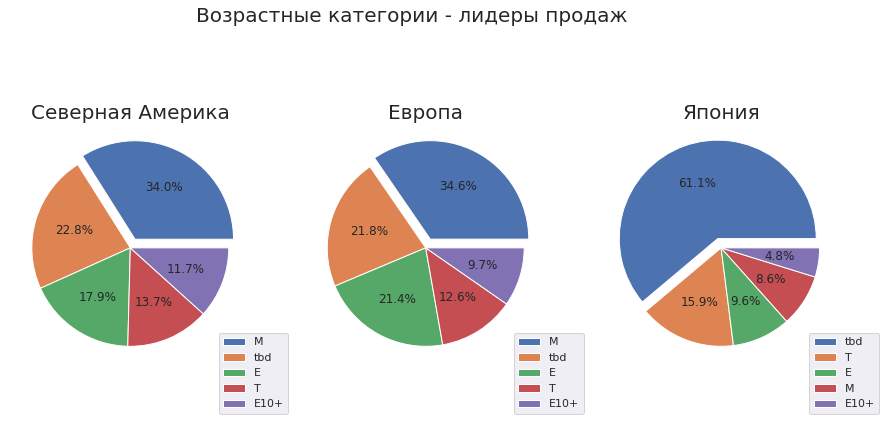

In [103]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Возрастные категории - лидеры продаж', fontsize=20)
plt.subplot(1, 3, 1)
pivot_category.na_sales.sort_values(ascending = False).head(5).plot(kind='pie', autopct='%1.1f%%', explode=(0.1,0,0,0,0), labeldistance=None)
plt.title('Северная Америка', fontsize=20)
plt.legend(loc='center', bbox_to_anchor=(1.0,-0.01))
plt.ylabel('')
 
plt.subplot(1, 3, 2)
pivot_category.eu_sales.sort_values(ascending = False).head(5).plot(kind='pie', autopct='%1.1f%%', explode=(0.1,0,0,0,0), labeldistance=None)
plt.title('Европа', fontsize=20)
plt.legend(loc='center', bbox_to_anchor=(1.0,-0.01))
plt.ylabel('')
 
plt.subplot(1, 3, 3)
pivot_category.jp_sales.sort_values(ascending = False).head(5).plot(kind='pie', autopct='%1.1f%%', explode=(0.1,0,0,0,0), legend=True, labeldistance=None)
plt.title('Япония', fontsize=20)
plt.legend(loc='center', bbox_to_anchor=(1.0,-0.01))
plt.ylabel('');

Анализ графических данных позволил сделать следующие наблюдения. 
Североамериканский и европейский рынки продаж имеют схожие возрастные категории для игр, которые значительно отличаются от японского рынка. В Северной Америке и Европе наиболее популярны категории "M" ("Взрослые", 17+) и "E" ("Все", 6+), при этом значительная часть продаж приходится на игры, не имеющие рейтинга ESRB. В Японии большинство продаваемых игр также не имеют рейтинга. Вероятно, это связано с тем, что в Японии существует собственная классификация игр по возрасту, или с тем, что классификация игр по возрасту в Японии не является обязательной.

### **Общий вывод v2**  
Изучив пять самых популярных платформ и жанров в NA, EU и JP, а также оценив влияние рейтингов ESRB на продажи в конкретных регионах, можно составить представление о пользователях в каждом регионе. 
Типичный североамериканский пользователь игр покупает экшн, шутеры и спортивные игры возрастных категорий M ("Взрослые", 17+) и E ("Все", 6+), а также игры, не имеющие рейтинга ESRB.
Средний европейский геймер покупает игры возрастных категорий M ("Для взрослых", от 17 лет и старше) и E ("Для всех", от 6 лет и старше) или экшены, шутеры и спортивные игры, не имеющие рейтинга ESRB, на платформах PS4 и XOne. Количество игр, приобретенных японскими потребителями, оценивается примерно в 1,5 миллиона.
Среднестатистический японский геймер покупает на 3DS и PS4 ролевые и экшн-игры, которые не имеют возрастного рейтинга ESRB. Игры на платформе Xone, которая является лидером рынка в Северной Америке и Европе, продаются в Японии очень мало, а игры в спортивном жанре, которые являются лидером рынка в Северной Америке и Европе, продаются в Японии очень мало. Большинство игр, продаваемых в Японии, не имеют рейтинга ESRB. Это может быть связано с уникальной японской классификацией игр по возрасту или с тем, что в этой стране классификация по возрасту не является обязательной.

Североамериканский и европейский рынки продаж имеют одни и те же основные жанры и схожие основные платформы и возрастные категории для игр. Японский рынок существенно отличается от североамериканского и европейского ни в одном из вышеперечисленных аспектов.

### **Общий вывод:**
Западные пользователи предпочитают "шутеры", совместимые с платформами PS4 и XOne, в то время как американские пользователи предпочитают жанр "экшн" - "sport", европейские пользователи предпочитают "гонки", а американские пользователи возглавляют список "файтингов". Образ японских геймеров совершенно иной: основной жанр игр - "экшн", а основная игровая консоль - 3DS. В большинстве случаев игровые жанры конкретного региона соответствуют духу и культуре страны, и игровые приставки выбираются на основе основных жанров. Действительно, некоторые платформы могут предлагать несколько жанров, чтобы удовлетворить потребности разных регионов; рейтинги ESRB влияют на игроков на Западе, за исключением Японии, где общий объем продаж игр без рейтингов выше.

## Проверьте гипотезы (Шаг 5.) 
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

*Комментарий:*
* *Задайте самостоятельно пороговое значение alpha.*
* *Поясните: Как вы сформулировали нулевую и альтернативную гипотезы;*
* *Поясните: Какой критерий применили для проверки гипотез и почему.*

In [104]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue,mean_score
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,78.0
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,tbd,40.24,0.0
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,82.5
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,80.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,tbd,31.38,0.0


### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Данная гипотеза будет о равенстве будет HO, соответственно не отвержение данной гипотезы будет означать равенство есть, а в случае отвержения, мы автоматически принимаем альтернативную о неравенстве. Год исследования - 2016.


In [105]:
xone = list(data[(data['year_of_release'] > 2015)&\
                           (data['platform'] == 'XOne')&(data['user_score'] != 0)]['user_score'])
pc = list(data[(data['year_of_release'] > 2015)&\
                         (data['platform'] == 'PC')&(data['user_score'] != 0)]['user_score'])

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    xone, 
    pc,
    equal_var = True)

print('p-значение: {:.5f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, рейтинги платформ Xbox One и PC разные")
else:
    print("Не получилось отвергнуть нулевую гипотезу, рейтинги платформ Xbox One и PC одинаковые")

p-значение: 0.33982
Не получилось отвергнуть нулевую гипотезу, рейтинги платформ Xbox One и PC одинаковые


Когда статистические тесты проводятся за весь период, рейтинги платформ оказываются разными, и нулевая гипотеза отвергается, но когда выбирается текущий период, 2016 год, ситуация меняется, и нулевая гипотеза больше не отвергается.


### Средние пользовательские рейтинги жанров Action и Sports разные

In [106]:
action = list(data[(data['year_of_release'] > 2015)&(data['genre'] == 'Action')]['user_score'])
sports = list(data[(data['year_of_release'] > 2015)&(data['genre'] == 'Sports')]['user_score'])


alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    action, 
    sports,
    equal_var = True)

print('p-значение: {:.5f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports разные")
else:
    print("Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports равные")

p-значение: 0.06453
Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports равные


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера: v1 </b>    
    
Добавь формулировку 2-ой гипотезы, пожалуйста.
</div>

Когда статистические тесты проводились за весь период, было обнаружено, что рейтинги экшена и спорта отличаются, и нулевая гипотеза была отвергнута, но когда был выбран текущий период - 2016 год, ситуация изменилась, нулевая гипотеза не была отвергнута, альтернативная гипотеза была отвергнута, и средние рейтинги были признаны равными со статистической значимостью 0,05.

<div class="alert alert-success">
<b>✅ Комментарий ревьюера v1: </b> 

Молодец, что не забыл исключить заглушку.

Проверки проведены верно!
</div>

## Итоговый вывод:

1. Первичный анализ выполнен, обнаружены проблемы с типами данных в столбцах: year_of_release, users_scores и разнорегистрововые наименования, для корректной работы требуется привести столбцы к int, float - типам, а наименования трансформировать в нижний регистр. 

Скорее всего при сборе данных из открытых источников присутсвовали не все данные и при попытке их сбора - поля заполнялись пустыми значениям.

Пропуск в наименовиии игр может быть из-за различий в кодировках и перевод в латиницу.

Отсутствие пользовательских отзывов и критиков: всё вышесказанное, плюс их могло просто не быть, такое характерно для игр прошлого. Отсутствие рейтинга или tbd означает не более чем, что издатель не захотел получать рейтинговую оценку ESRB или игра не планировалась выпускаться для региона NA.



2. Подготовка данных к анализу выполнена:
    1. Строки с пропуском имени были удаленны, так же как и строки с пропуском жанра.
    2. Пропуски в столбце rating были замененны на tbd, что означает что рейтинга нет или он ожидается
    3. Пропуски в столбцах critic_score и user_score были заменены на нулевые, что означает, что нет оценки. Сделать замену на медианное или какое-либо иное значение на текущем этапе нельзя, т.к. будет смещение в данных.
    4. Суммарные продажи посчитаны.
    
    
3. Исследовательский анализ выполнен:
   
   До 1994 года для каждой платформы выпускалось не более 50 игр в год, с 1994 года количество игр для платформы начало расти и удвоилось в пятилетней тенденции, но в 2008 году  было выпущено 1430 игр, с 2009 года их количество начало снижаться, а в 2012 году - вдвое больше, чем в 2011 году - зафиксирована тенденция к снижению, среднегодовое количество -579+/-60 игр.

  Средний срок жизни платформы - 7 лет

   Предварительный - да, но не зватает дополнительных данных активность игроков на платформе.* 

  Количество игр растёт на платформах PS4 и XOne, в отличии от 3DS и WiiU

  Топ-3 игры: Fifa 17, Pokemon Sun/Moon, Uncharted 4 - из графика можно сделать вывод, что PS4, 3DS и XOne являются топовыми платформами, так как именно эти игры имеют самые высокие показатели продаж; ПК - платформа с большим сроком службы, но никто не собирается от нее отказываться, так как она ассоциируется со многими другими возможностями! В этом есть смысл.

   Корреляционная зависимость между отзывами пользователей,критиков и продажами есть, но слабо выраженая. Например у самой кассовой игры 2016 года - Fifa 17, далеко не самый высокий показатель. Есть игры, отзывы которых высокие, но продажи среднии. Тут с моей точки зрения нужны более свежии данные с более высоким уровнем качества.  

*    Для платформы PS4 корреляция между продажами и отзывами пользователей составляет: -0,043 -  очень слабая, отрицательная, в то же время оценки критиков коррелируют: 0,4 - слабая корреляция, положительная, средние отзывы слабо коррелируют из-за различий в корреляции для конкретной платформы.
* Для платформы XOne корреляция между продажами и отзывами пользователей составляет: -0,092 - очень слабая, отрицательная, в то же время оценки критиков коррелируют: 0,42 - слабая корреляция, положительная, средние отзывы коррелируют слабо из-за различий в корреляции для конкретных платформ.
* Для платформы 3DS корреляция между продажами и отзывами пользователей составляет: 0,28 - слабая корреляция, положительная; в то же время отзывы критиков составляют: 0,28 - слабая корреляция, положительная; средние отзывы имеют слабую корреляцию, поскольку они смещены к пользовательского сегменту.

   Таким образом, отзывы пользователей в основном слабо коррелируют и в отрицательном направлении, в отличие от отзывов критиков, которые здесь также показывают среднюю корреляцию от 0,34 до 0,41. Среднее значение отзывов не выявляет корреляции между отзывами и продажами, так как оно постоянно колеблется. Таким образом, критики предсказывают успех игры более точно, чем пользователи. Конечно, этот вывод немного странный, но с моей точки зрения он заслуживает дальнейшего анализа.
    
  Выводы с продажами игр на других платформах.  
    * Игровая индустрия очень быстро изменяется;  
    * Тренд выручки нисходящий;  
    * Топ платформы: PS4, WiiU, XOne, 3DS;
    * Топовые жанры: Shooters, Sports, Role-playing - 2016 и 2015 годов.
    * Топ-низ жанры: Adventure, Puzzle
    
    
4. Портреты пользователей составлены (*по суммарным показателям выручки*):
    1. Самые популярные платформы (топ-5).
        1. EU: PS4, XOne, PC, 3DS, WiiU - Европа
        2. JP: 3DS, PS4, PSV, PS3, WiiU - Япония
        3. NA: PS4, XOne, 3DS, WiiU, PC - CША
    2. Самые популярные жанры (топ-5)
        1. EU: Shooter, Sports, Action, Role-Playing, Racing - Европа
        2. JP: Action, Role-Playing, Adventure, Shooter, Misc - Япония
        3. NA: Shooter, Action, Sports, Role-Playing, Fighting - CША
    3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?
        1. Да, влияние есть, и это проявляется на графике, кроме региона - Япония, здесь сумарные продажи у игр без рейтинга выше.

   Западные пользователи предпочитают "шутеры", совместимые с платформами PS4 и XOne, в то время как американские пользователи предпочитают жанр "экшн" - "sport", европейские пользователи предпочитают "гонки", а американские пользователи возглавляют список "файтингов". Образ японских геймеров совершенно иной: основной жанр игр - "экшн", а основная игровая консоль - 3DS. В большинстве случаев игровые жанры конкретного региона соответствуют духу и культуре страны, и игровые приставки выбираются на основе основных жанров. Действительно, некоторые платформы могут предлагать несколько жанров, чтобы удовлетворить потребности разных регионов; рейтинги ESRB влияют на игроков на Западе, за исключением Японии, где общий объем продаж игр без рейтингов выше.


5. Проверка гипотез
    1. Первая гипотеза: HO - подтвердилась, H1 - отвергнута. Что подтвердило статистическую гипотезу о равенстве пользовательских рейтингов, т.к. базировалась она на нулевой. При проведении статистического теста по всему периоду, получилось, что рейтинги платформ разные и нулевая гипотеза отвергалась, но когда был выбран актуальный период - 2016 год, то ситуация изменилась и нулевая гипотеза не отвергнута. 
    2. Вторая гипотеза: HO - принята, H1 - отвергнута. При проведении статистического теста по всему периоду, получилось, что рейтинги жанров action и sports разные и нулевая гипотеза отвергалась, НО когда был выбран актуальный период, то ситуация изменилась и нулевая гипотеза не отвергнута, что означет, что альтернативная гипотеза отвергнута и средние рейтинги равны со статистической значимостью 0.05.
